In [1]:
#Stress Testing 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report ,precision_score, recall_score, accuracy_score

from patsy import dmatrices



import cufflinks as cf
import plotly as py
import plotly.express as px
from plotly.offline import iplot, init_notebook_mode
cf.go_offline(connected=True)
init_notebook_mode(connected=True)

In [2]:
# keep the random seed
np.random.seed(112)

# create a series with the specified dates
dates = pd.date_range('2017-01-01', '2019-10-31')
len(dates)


1034

In [3]:
# Creating time series in a list of random movement 
error = np.random.normal(0,2,len(dates))
Y_0 = 8000
mu = 500
phi = 0.7

def random_time_series( Y_0 , mu , phi ):
    TS = [None] * len(dates)
    std = mu* 0.33
    error = np.random.normal(mu,std,len(dates))
    y = Y_0*10
    a =list(range(0,100))
    b=[]
    c= [0,1,2,3,5,10,15,19,26,32,38,42]
    for y in c:
        for x in a:
            b.append(y)
    d =np.array(b)
    d
    for i, row in enumerate(dates):
        TS[i] = mu + y * phi + 0.135*error[i] +d[i]*mu*0.035
        y = TS[i] - .8*mu
    return  TS
    


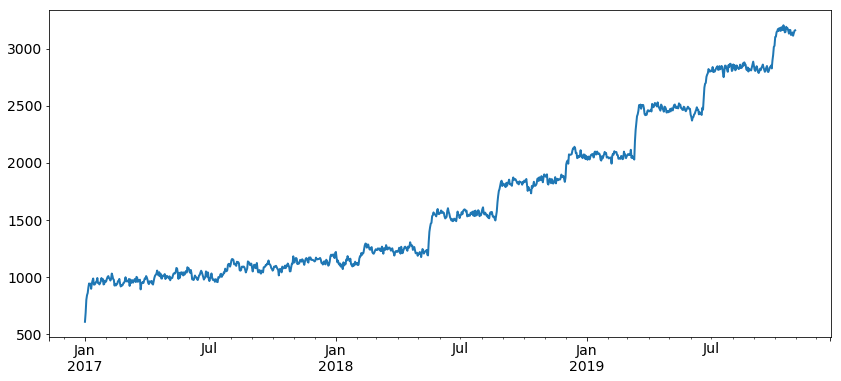

In [4]:
#Function Test
np.random.seed(1234)
vanilla_ts = random_time_series( Y_0 , mu , phi )
series =  pd.Series(vanilla_ts, index=dates)
series.plot(figsize=(14,6), linewidth=2, fontsize=14)



In [6]:
assets = 1000000000
name = 'Edwards_Trust_Fund'
def assets_portfolio(assets, name):
    asset_port = pd.DataFrame()
    asset_port['date'] = dates
    asset_port['name'] = name
    RM = assets*0.30 
    
    RMmu = RM / 3500
    mu = RMmu
    RMstd= 0.33 * RMmu
    std = RMstd
    random_yo = np.random.normal(mu,std,1)
    RMYo = 1*(RMmu)
    RMrate = 0.07
    asset_port['Residential_Mortgages'] = random_time_series( RMYo , RMmu , RMrate )
    
    CL = assets*0.20 
    CLmu = CL / 906
    CLstd = 0.33* CLmu
    mu = CLmu 
    std = CLstd
    random_yo = np.random.normal(mu,std,1)
    CLYo = 1 * CLmu 
    CLrate = 0.049
    
    asset_port['Commercial_Loans'] = random_time_series(CLYo, CLmu, CLrate)
    
    PL = assets*0.150 
    PLmu = PL / 860
    PLstd = 0.33* PLmu
    mu = PLmu 
    std = PLstd 
    random_yo = np.random.normal(mu,std,1)
    PLYo = 1 * PLmu 
    PLrate = 0.135
    asset_port['Personal_Loans'] = random_time_series(PLYo, PLmu, PLrate)
    
    
    FL = assets*0.05 
    FLmu = FL / 450
    FLstd = 0.33* FLmu
    mu = FLmu  
    std = FLstd 
    random_yo = np.random.normal(mu,std,1)
    FLYo = 1 * FLmu 
    FLrate = 0.059
    asset_port['Financial_Lease'] = random_time_series(FLYo, FLmu, FLrate)
    
    
    FI = assets*0.15 
    FImu = FI / 1506
    FIstd = 0.33* FImu
    mu = FImu  
    std = FIstd 
    random_yo = np.random.normal(mu,std,1)
    FIYo = 1 * FImu 
    FIrate = 0.0025
    asset_port['Financial_Investments'] = random_time_series(FIYo, FImu, FIrate)
    
    OI = assets*0.05 
    OImu = OI / 609
    OIstd = 0.33* OImu
    mu = OImu  
    std = OIstd 
    random_yo = np.random.normal(mu,std,1)
    OIYo =  OImu 
    OIrate = 0.101
    asset_port['Other_Investments'] = random_time_series(OIYo, OImu, OIrate)
    
    I = assets*0.01 
    Imu = I / 656
    Istd = 0.33* Imu
    mu = Imu  
    std = Istd 
    random_yo = np.random.normal(mu,std,1)
    IYo =  Imu 
    Irate = 0.0046
    asset_port['Inventories'] = random_time_series(IYo, Imu, Irate)
    
    IA = assets*0.03 
    IAmu = IA / 325
    IAstd = 0.33* IAmu
    mu = IAmu  
    std = IAstd
    random_yo = np.random.normal(mu,std,1)
    IAYo =  IAmu 
    IArate = 0.0095
    asset_port['Intangible_Assets'] = random_time_series(IAYo, IAmu, IArate)
    
    CE = assets*0.04 
    CEmu = CE / 750
    CEstd = 0.33* CEmu
    mu = CEmu 
    std = CEstd
    random_yo = np.random.normal(mu,std,1)
    CEYo =  CEmu 
    CErate = 0.048
    asset_port['Cash_Equivalent'] = random_time_series(CEYo, CEmu, CErate)
    
    OR = assets*0.02 
    ORmu = OR / 103
    ORstd = 0.33* ORmu
    mu = ORmu 
    std = ORstd
    random_yo = np.random.normal(mu,std,1)
    ORYo =  ORmu 
    ORrate = 0.0078
    asset_port['Other_Receivables'] = random_time_series(ORYo, ORmu, ORrate)
    
    asset_port = asset_port.round(2)
    
    
    return asset_port


In [7]:
as_por =assets_portfolio(assets, name).iloc[15:,:]
#Improvements could be adding parameter of stability or liklihood of reimbursement
#Also consider continuous updating
as_por.head(1)

date                name  Residential_Mortgages  Commercial_Loans  \
15 2017-01-16  Edwards_Trust_Fund               107745.4         256292.69   

    Personal_Loans  Financial_Lease  Financial_Investments  Other_Investments  \
15       215963.61        136023.78              113536.16          103545.05   

    Inventories  Intangible_Assets  Cash_Equivalent  Other_Receivables  
15     17996.79          107350.16         57115.21          216592.97

In [8]:
as_por.describe().round(2)

Residential_Mortgages  Commercial_Loans  Personal_Loans  \
count                1019.00           1019.00         1019.00   
mean               139151.30         354910.97       294424.35   
std                 37337.69          94249.44        81825.80   
min                 88675.63         231270.30       191107.63   
25%                106525.86         273479.04       223198.68   
50%                129492.88         329526.11       273070.37   
75%                163901.94         414864.63       348310.98   
max                230239.76         584250.98       496789.20   

       Financial_Lease  Financial_Investments  Other_Investments  Inventories  \
count          1019.00                1019.00            1019.00      1019.00   
mean         179797.00              156531.05          135660.85     23968.69   
std           48147.57               40533.38           37047.96      6186.78   
min          119305.52              102241.26           88547.18     15668.27   
25%          137933.16              121289.04          103564.19     18675.12   
50%          167527.06              144292.87          124799.01     22174.83   
75%          211811.02              184148.48          159936.98     28171.98   
max          293141.31              253542.78          226808.90     38811.40   

       Intangible_Assets  Cash_Equivalent  Other_Receivables  
count            1019.00          1019.00            1019.00  
mean           145253.76         85740.25          305584.12  
std             37838.54         22756.88           79845.53  
min             96032.23         55179.17          201223.50  
25%            112541.81         65901.31          236529.59  
50%            133784.80         80078.44          282630.37  
75%            171740.16        100655.56          360094.69  
max            240092.45        143324.64          503382.23

Text(0.5,1,'Commercial Loans')

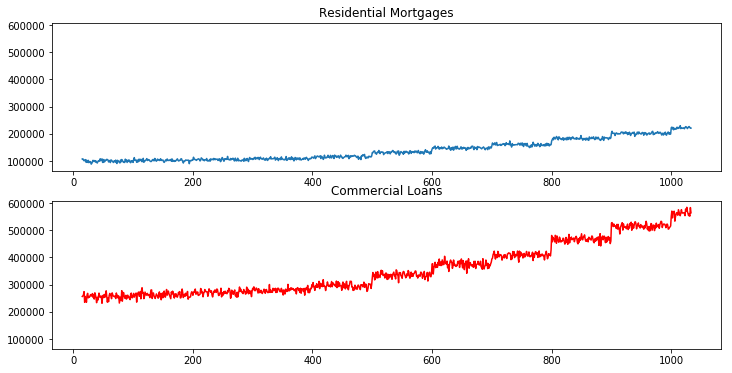

In [9]:
f, (ax1, ax2) = plt.subplots(2, 1,figsize = (12,6), sharey=True)

ax1.plot(as_por.Residential_Mortgages, label = 'Residential_Mortgages')
ax1.set_title('Residential Mortgages')

print('')
ax2.plot(as_por.Commercial_Loans, label = 'Commercial_Loans', color ='r' )
ax2.set_title('Commercial Loans')

In [10]:
def asset_diagram(as_por):
    plt.figure(figsize = (24,12))
    plt.plot(as_por.Residential_Mortgages, label = 'Residential Mortgages', color = 'lime', linewidth =1 )
    plt.plot(as_por.Commercial_Loans, label = 'Commercial Loans', color = 'b', linewidth =1 )
    plt.plot(as_por.Personal_Loans, label = 'Personal Loans', color = 'darkgreen', linewidth =1 )
    plt.plot(as_por.Financial_Lease, label = 'Financial_Lease', color = 'm', linewidth =1 )
    plt.plot(as_por.Financial_Investments, label = 'Financial Investments', color = 'k', linewidth =1 )
    plt.plot(as_por.Other_Investments, label = 'Other Investments', color = 'y', linewidth =1 )
    plt.plot(as_por.Inventories, label = 'Inventories', color = 'c', linewidth =1 )
    plt.plot(as_por.Intangible_Assets, label = 'Intangible Assets', color = 'r', linewidth =1 )

    plt.xlabel('Days')
    plt.ylabel('Capital')

    plt.title("Asset Portfolio Under Ideal Conditions")

    plt.legend()

    plt.show()
    return


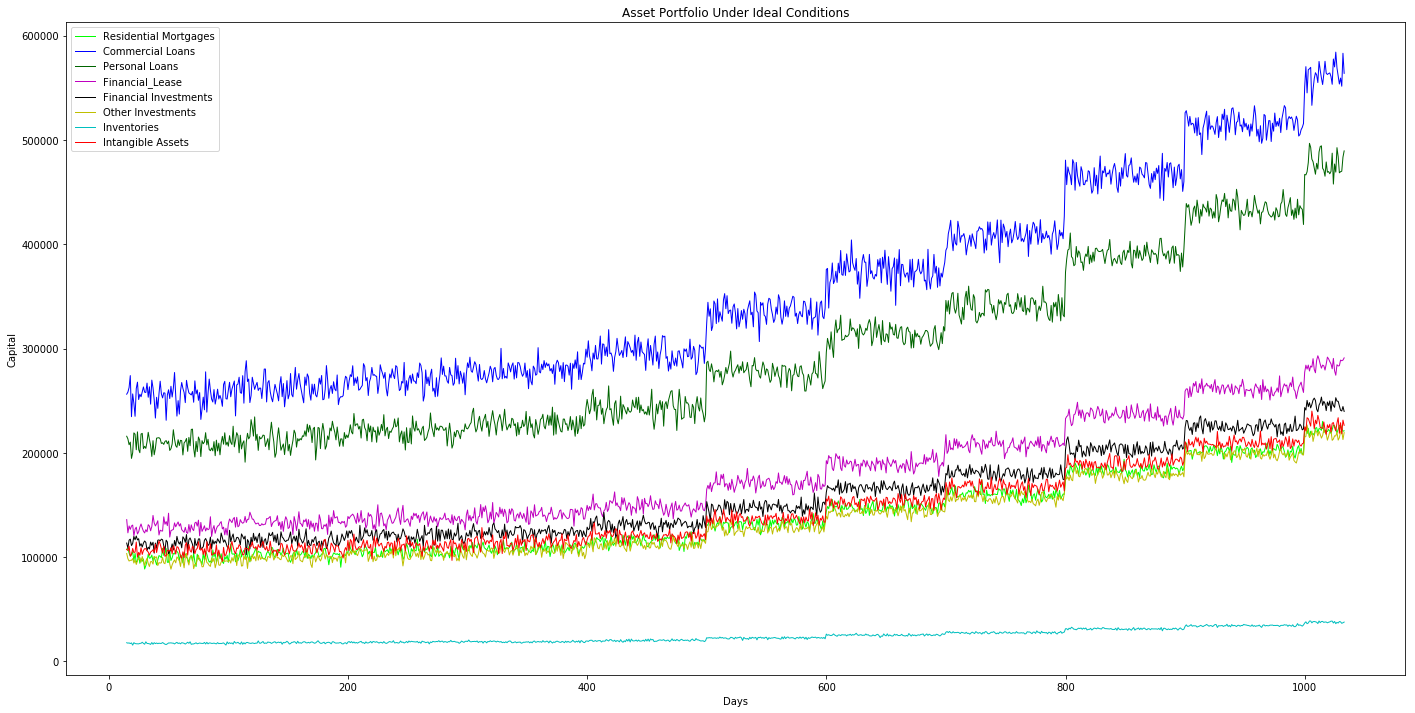

In [11]:
asset_diagram(as_por)

In [12]:
def liabilities_portfolio(assets, name):
    lia_port = pd.DataFrame()
    lia_port['date'] = dates
    
    
    TD = assets*0.42 
    TDmu = TD / 4500 
    TDstd = 0.33* TDmu
    mu = TDmu 
    std = TDstd
    random_yo = np.random.normal(mu,std,1)
    TDYo =  TDmu 
    TDrate = 0.079
    lia_port['Term_Deposit'] = random_time_series( TDYo , TDmu , TDrate )
    
    
    DD = assets*0.25 
    DDmu = DD / 2700
    DDstd = 0.33* DDmu
    mu = DDmu 
    std = DDstd
    random_yo = np.random.normal(mu,std,1)
    DDYo =  DDmu 
    DDrate = 0.079
    lia_port['Demand_Deposit'] = random_time_series( DDYo , DDmu , DDrate )
    
    BD = assets*0.08 
    BDmu = BD / 500 
    BDstd = 0.33* BDmu
    mu = BDmu 
    std = BDstd
    random_yo = np.random.normal(mu,std,1)
    BDYo =  BDmu 
    BDrate = 0.109
    lia_port['Broker_Deposit'] = random_time_series( BDYo , BDmu , BDrate )
    
    SB = assets*0.04 
    SBmu = SB / 2500
    SBstd = 0.33* SBmu
    mu = SBmu 
    std = SBstd
    random_yo = np.random.normal(mu,std,1)
    SBYo = SBmu 
    SBrate = 0.125
    lia_port['Short_Borrow'] = random_time_series( SBYo , SBmu , SBrate )
    
    
    LB = assets*0.12 
    LBmu = LB / 2100 
    LBstd = 0.33* LBmu
    mu = LBmu 
    std = LBstd
    random_yo = np.random.normal(mu,std,1)
    LBYo =  LBmu 
    LBrate = 0.068
    lia_port['Long_Borrow'] = random_time_series( LBYo , LBmu , LBrate )
    
    NL = assets*0.05 
    NLmu = NL / 1200
    NLstd = 0.33* NLmu
    mu = NLmu 
    std = NLstd
    random_yo = np.random.normal(mu,std,1)
    NLYo =  NLmu 
    NLrate = 0.057
    lia_port['NonInterest_Liabilities'] = random_time_series( NLYo , NLmu , NLrate )
    
    
    DR = assets*0.02 
    DRmu = DR / 420
    DRstd = 0.33* DRmu
    mu = DRmu 
    std = DRstd
    random_yo = np.random.normal(mu,std,1)
    DRYo =  DRmu 
    DRrate = 0.035
    lia_port['Term_Deposit'] = random_time_series( DRYo , DRmu , DRrate )
    
    
    OP = assets*0.02 
    OPmu = OP / 310
    OPstd = 0.33* OPmu
    mu = OPmu 
    std = OPstd
    random_yo = np.random.normal(mu,std,1)
    OPYo =  OPmu 
    OPrate = 0.043
    lia_port['Other_Payable'] = random_time_series( TDYo , TDmu , TDrate )
    lia_port = lia_port.round(2)
    return lia_port


In [13]:
lb_df = liabilities_portfolio(assets, name).round(2)
lb_df.head(1)

date  Term_Deposit  Demand_Deposit  Broker_Deposit  Short_Borrow  \
0 2017-01-01      54696.91       106342.62       173314.87      17723.99   

   Long_Borrow  NonInterest_Liabilities  Other_Payable  
0     66463.73                 45736.32      109719.05

In [14]:
def liability_diagram(lb_df):
    plt.figure(figsize = (24,12))
    plt.plot(lb_df.Term_Deposit, label = 'Term Deposit', color = 'lime', linewidth =1 )
    plt.plot(lb_df.Demand_Deposit, label = 'Demand Deposit', color = 'b', linewidth =1 )
    plt.plot(lb_df.Broker_Deposit, label = 'Broker Deposit', color = 'darkgreen', linewidth =1 )
    plt.plot(lb_df.Short_Borrow, label = 'Short Borrow', color = 'm', linewidth =1 )
    plt.plot(lb_df.Long_Borrow, label = 'LongBorrow', color = 'k', linewidth =1 )
    plt.plot(lb_df.Other_Payable, label = 'Other Payable', color = 'y', linewidth =1 )
    plt.plot(lb_df.NonInterest_Liabilities, label = 'NonInterest_Liabilities', color = 'c', linewidth =1 )

    plt.xlabel('Days')
    plt.ylabel('Capital')

    plt.title("Liability Portfolio Under Ideal Conditions")

    plt.legend()

    plt.show()
    return


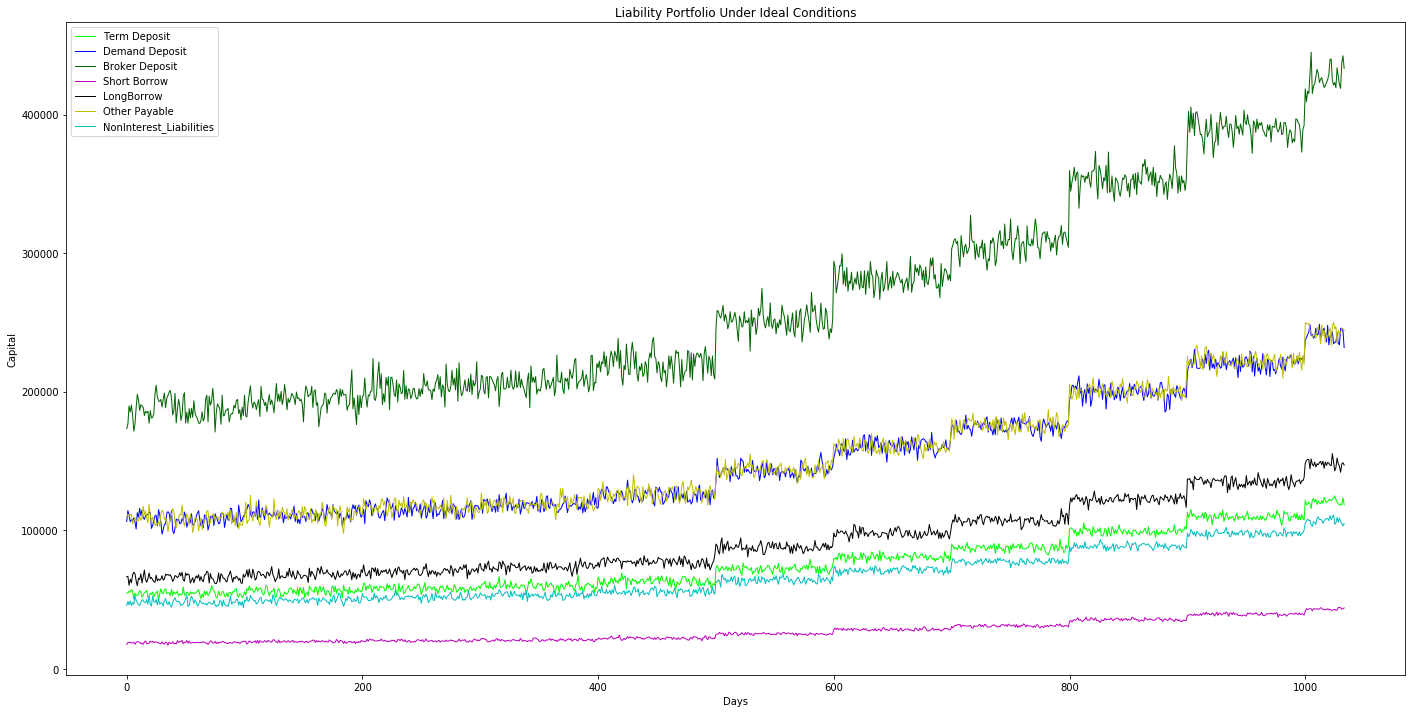

In [15]:
liability_diagram(lb_df)

In [16]:
#Creates table of Assets and Liabilities
def combine_portfolios(as_por,lb_df):
    df = as_por.merge(lb_df, left_on='date', right_on='date')
    df['datetime'] = pd.to_datetime(df['date'])
    df = df.set_index('datetime')
    df.drop(['date'], axis=1, inplace=True)
    
    return df


In [17]:
df = combine_portfolios(as_por,lb_df)
df.head(1)

name  Residential_Mortgages  Commercial_Loans  \
datetime                                                                  
2017-01-16  Edwards_Trust_Fund               107745.4         256292.69   

            Personal_Loans  Financial_Lease  Financial_Investments  \
datetime                                                             
2017-01-16       215963.61        136023.78              113536.16   

            Other_Investments  Inventories  Intangible_Assets  \
datetime                                                        
2017-01-16          103545.05     17996.79          107350.16   

            Cash_Equivalent  Other_Receivables  Term_Deposit  Demand_Deposit  \
datetime                                                                       
2017-01-16         57115.21          216592.97      55159.93       107881.52   

            Broker_Deposit  Short_Borrow  Long_Borrow  \
datetime                                                
2017-01-16       182843.21      19273.55     71329.97   

            NonInterest_Liabilities  Other_Payable  
datetime                                            
2017-01-16                 48062.62      111032.88

In [18]:
#Creates a table of the Equity Risk of the Assets due to change 
# in stock prices might affect portfolio
def equity_risk_df(stress):
    er_df = pd.DataFrame()

    er_df['date'] = dates
    er_df['datetime'] = pd.to_datetime(er_df['date'])
    er_df = er_df.set_index('datetime')
    er_df.drop(['date'], axis=1, inplace=True)
    
    a =list(range(0,100))
    b=[]
    c= [3,5,10,15,17,19,26,30,32,38,42]
    for y in c:
        for x in a:
            if(len(b)<1034):
                b.append(y)
    d =np.array(b)
    er_df['Decr_%_of_Stock'] = d* 0.5 * stress

    er_df['Residential_Mortgages'] = df['Residential_Mortgages']*er_df['Decr_%_of_Stock']*(-1.2)+df['Residential_Mortgages']
    er_df['Commercial_Loans'] = df['Commercial_Loans']*er_df['Decr_%_of_Stock']*(-1.8)+df['Commercial_Loans']
    er_df['Personal_Loans'] = df['Personal_Loans']*er_df['Decr_%_of_Stock']*(-1.22)+df['Personal_Loans']
    er_df['Financial_Lease'] = df['Financial_Lease']*er_df['Decr_%_of_Stock']*(-1.52)+df['Financial_Lease']
    er_df['Financial_Investments'] = df['Financial_Investments']*er_df['Decr_%_of_Stock']*(-1.62)+df['Financial_Investments']
    er_df['Other_Investments'] = df['Other_Investments']*er_df['Decr_%_of_Stock']*(-1.32)+df['Other_Investments']
    er_df['Intangible_Assets'] = df['Intangible_Assets']*er_df['Decr_%_of_Stock']*(-1.74)+df['Intangible_Assets']
    er_df['Inventories'] = df['Inventories']*er_df['Decr_%_of_Stock']*(-1.12)+df['Inventories']
    er_df['Cash_Equivalent'] = df['Cash_Equivalent']*er_df['Decr_%_of_Stock']*(-1.65)+df['Cash_Equivalent']
    er_df['Other_Receivables'] = df['Other_Receivables']*er_df['Decr_%_of_Stock']*(-1.32)+df['Other_Receivables']

    er_df['Term_Deposit'] = df['Term_Deposit']*er_df['Decr_%_of_Stock']*(1.18)+df['Term_Deposit']
    er_df['Demand_Deposit'] = df['Demand_Deposit']*er_df['Decr_%_of_Stock']*(1.052)+df['Demand_Deposit']
    er_df['Broker_Deposit'] = df['Broker_Deposit']*er_df['Decr_%_of_Stock']*(1.092)+df['Broker_Deposit']
    er_df['Long_Borrow'] = df['Long_Borrow']*er_df['Decr_%_of_Stock']*(1.22)+df['Long_Borrow']
    er_df['Short_Borrow'] = df['Short_Borrow']*er_df['Decr_%_of_Stock']*(1.148)+df['Short_Borrow']
    er_df['NonInterest_Liabilities'] = df['NonInterest_Liabilities']*er_df['Decr_%_of_Stock']*(1.062)+df['NonInterest_Liabilities']
    er_df['Other_Payable'] = df['Other_Payable']*er_df['Decr_%_of_Stock']*(1.08)+df['Other_Payable']

    er_df['Total_Assets'] = (er_df['Other_Receivables'] + er_df['Cash_Equivalent'] + er_df['Inventories'] + er_df['Intangible_Assets'] +  er_df['Other_Investments']+ er_df['Financial_Investments']+ er_df['Financial_Lease'] + er_df['Residential_Mortgages'] + er_df['Commercial_Loans'])
    er_df['Total_Liability'] = er_df['Term_Deposit']+er_df['Demand_Deposit']+er_df['Broker_Deposit']+er_df['Long_Borrow']+er_df['Short_Borrow']+ er_df['NonInterest_Liabilities']+er_df['Other_Payable']
    er_df['Spread'] = er_df['Total_Assets'] - er_df['Total_Liability']
    er_df['Spread_Perentage'] = (er_df['Spread']/ er_df['Total_Assets'])*100
    er_df = er_df.round(2)
    er_df = er_df.iloc[15:,:]
    return er_df


In [19]:
er_df = equity_risk_df(.02)
er_df.head(1)

Decr_%_of_Stock  Residential_Mortgages  Commercial_Loans  \
datetime                                                               
2017-01-16             0.03              103866.57         242452.88   

            Personal_Loans  Financial_Lease  Financial_Investments  \
datetime                                                             
2017-01-16       208059.34         129821.1               108018.3   

            Other_Investments  Intangible_Assets  Inventories  \
datetime                                                        
2017-01-16           99444.67          101746.48      17392.1   

            Cash_Equivalent        ...         Demand_Deposit  Broker_Deposit  \
datetime                           ...                                          
2017-01-16         54288.01        ...              111286.26       188833.15   

            Long_Borrow  Short_Borrow  NonInterest_Liabilities  Other_Payable  \
datetime                                                                        
2017-01-16     73940.65      19937.33                  49593.9      114630.35   

            Total_Assets  Total_Liability     Spread  Spread_Perentage  
datetime                                                                
2017-01-16    1065045.99        615334.22  449711.77             42.22  

[1 rows x 22 columns]

In [20]:
#Combines similar amounts of stress put on assets into intervals
def spread_of_stress(er_df):
    bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90,100]
    er_df['Stress'] = pd.cut(er_df['Spread_Perentage'], bins)
    return er_df['Stress'].value_counts()
spread_of_stress(er_df)

(10, 20]     191
(30, 40]     122
(0, 10]      102
(20, 30]      88
(40, 50]      82
(90, 100]      0
(80, 90]       0
(70, 80]       0
(60, 70]       0
(50, 60]       0
Name: Stress, dtype: int64

In [21]:
#Creates a Plot of the applied Stress over time
def equity_stress_diagram(er_df):
    plt.figure(figsize = (24,12))
    plt.plot(er_df.Residential_Mortgages, label = 'Residential Mortgages', color = 'lime', linewidth =1 )
    plt.plot(er_df.Commercial_Loans, label = 'Commercial Loans', color = 'b', linewidth =1 )
    plt.plot(er_df.Personal_Loans, label = 'Personal Loans', color = 'darkgreen', linewidth =1 )
    plt.plot(er_df.Financial_Lease, label = 'Financial_Lease', color = 'm', linewidth =1 )
    plt.plot(er_df.Financial_Investments, label = 'Financial Investments', color = 'k', linewidth =1 )
    plt.plot(er_df.Other_Investments, label = 'Other Investments', color = 'y', linewidth =1 )
    plt.plot(er_df.Inventories, label = 'Inventories', color = 'c', linewidth =1 )
    plt.plot(er_df.Intangible_Assets, label = 'Intangible Assets', color = 'r', linewidth =1 )
    plt.plot(er_df.Term_Deposit, label = 'Term Deposit', color = 'lime', linewidth =1 )
    plt.plot(er_df.Demand_Deposit, label = 'Demand Deposit', color = 'b', linewidth =1 )
    plt.plot(er_df.Broker_Deposit, label = 'Broker Deposit', color = 'darkgreen', linewidth =1 )
    plt.plot(er_df.Short_Borrow, label = 'Short Borrow', color = 'm', linewidth =1 )
    plt.plot(er_df.Long_Borrow, label = 'LongBorrow', color = 'k', linewidth =1 )
    plt.plot(er_df.Other_Payable, label = 'Other Payable', color = 'y', linewidth =1 )
    plt.plot(er_df.NonInterest_Liabilities, label = 'NonInterest_Liabilities', color = 'c', linewidth =1 )

    plt.xlabel('Days')
    plt.ylabel('Capital')
    plt.title("Equity Risk Portfolio")

    plt.legend()

    plt.show()
    return


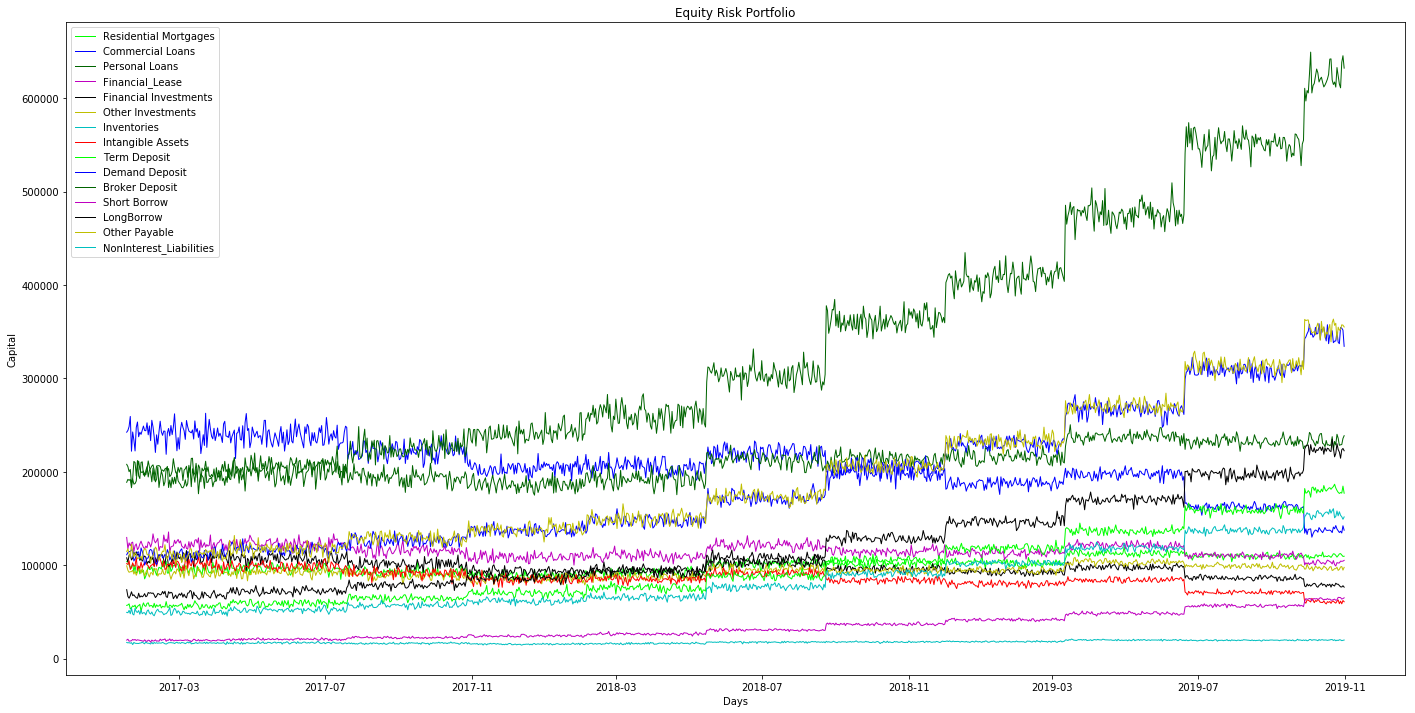

In [22]:
equity_stress_diagram(er_df)
    

In [23]:
#Creates a Table of the difference of Assets and Liabilities
def spread_df(er_df, df):    
    sp_df = pd.DataFrame()
    sp_df['date'] = dates

    sp_df['datetime'] =pd.to_datetime(sp_df['date'])
    sp_df = sp_df.set_index('datetime')
    sp_df.drop(['date'], axis =1, inplace=True)
    sp_df = sp_df.iloc[15:,:]

    sp_df['Dec_Residential_Mortgages'] = df['Residential_Mortgages'].values - er_df['Residential_Mortgages'].values
    sp_df['Dec_Commercial_Loans'] = df['Commercial_Loans'] - er_df['Commercial_Loans']
    sp_df['Dec_Personal_Loans'] = df['Personal_Loans'] - er_df['Personal_Loans']
    sp_df['Dec_Financial_Lease'] = df['Financial_Lease'] - er_df['Financial_Lease']
    sp_df['Dec_Financial_Investments'] = df['Financial_Investments'] - er_df['Financial_Investments']
    sp_df['Dec_Other_Investments'] = df['Other_Investments'] - er_df['Other_Investments']
    sp_df['Dec_Inventories'] = df['Inventories'] - er_df['Inventories']
    sp_df['Dec_Intangible_Assets'] = df['Intangible_Assets'] - er_df['Intangible_Assets']
    sp_df['Dec_Cash_Equivalent'] = df['Cash_Equivalent'] - er_df['Cash_Equivalent']
    sp_df['Dec_Other_Receivables'] = df['Other_Receivables'] - er_df['Other_Receivables']

    sp_df['Inc_Term_Deposit'] = er_df['Term_Deposit'] - df['Term_Deposit']
    sp_df['Inc_Demand_Deposit'] = er_df['Demand_Deposit'] - df['Demand_Deposit']
    sp_df['Inc_Broker_Deposit'] = er_df['Broker_Deposit'] - df['Broker_Deposit']
    sp_df['Inc_Short_Borrow'] = er_df['Short_Borrow'] - df['Short_Borrow']
    sp_df['Inc_Long_Borrow'] = er_df['Long_Borrow'] - df['Long_Borrow']
    sp_df['Inc_NonInterest_Liabilities'] = er_df['NonInterest_Liabilities'] - df['NonInterest_Liabilities']
    sp_df['Inc_Other_Payable'] = er_df['Other_Payable'] - df['Other_Payable']
    sp_df['Total_Assets'] =sp_df['Dec_Residential_Mortgages']+sp_df['Dec_Commercial_Loans']+sp_df['Dec_Personal_Loans']+sp_df['Dec_Financial_Lease']+sp_df['Dec_Financial_Investments']+ sp_df['Dec_Other_Investments']+sp_df['Dec_Inventories']+sp_df['Dec_Intangible_Assets']+ sp_df['Dec_Cash_Equivalent']+sp_df['Dec_Other_Receivables'] 

    sp_df['Total_Liability']  =sp_df['Inc_Term_Deposit']+sp_df['Inc_Demand_Deposit']+sp_df['Inc_Broker_Deposit']+sp_df['Inc_Short_Borrow']+sp_df['Inc_Long_Borrow']+ sp_df['Inc_NonInterest_Liabilities']+sp_df['Inc_Other_Payable']
    sp_df['Spread']= sp_df['Total_Assets']  - sp_df['Total_Liability'] 
    sp_df['Spread_Percentage'] = sp_df['Spread'] / sp_df['Total_Assets']
    return sp_df


In [24]:
sp_df = spread_df(er_df, df)
sp_df.head(1)

Dec_Residential_Mortgages  Dec_Commercial_Loans  \
datetime                                                      
2017-01-16                    3878.83              13839.81   

            Dec_Personal_Loans  Dec_Financial_Lease  \
datetime                                              
2017-01-16             7904.27              6202.68   

            Dec_Financial_Investments  Dec_Other_Investments  Dec_Inventories  \
datetime                                                                        
2017-01-16                    5517.86                4100.38           604.69   

            Dec_Intangible_Assets  Dec_Cash_Equivalent  Dec_Other_Receivables  \
datetime                                                                        
2017-01-16                5603.68               2827.2                8577.08   

                  ...          Inc_Demand_Deposit  Inc_Broker_Deposit  \
datetime          ...                                                   
2017-01-16        ...                     3404.74             5989.94   

            Inc_Short_Borrow  Inc_Long_Borrow  Inc_NonInterest_Liabilities  \
datetime                                                                     
2017-01-16            663.78          2610.68                      1531.28   

            Inc_Other_Payable  Total_Assets  Total_Liability    Spread  \
datetime                                                                 
2017-01-16            3597.47      59056.48         19750.55  39305.93   

            Spread_Percentage  
datetime                       
2017-01-16           0.665565  

[1 rows x 21 columns]

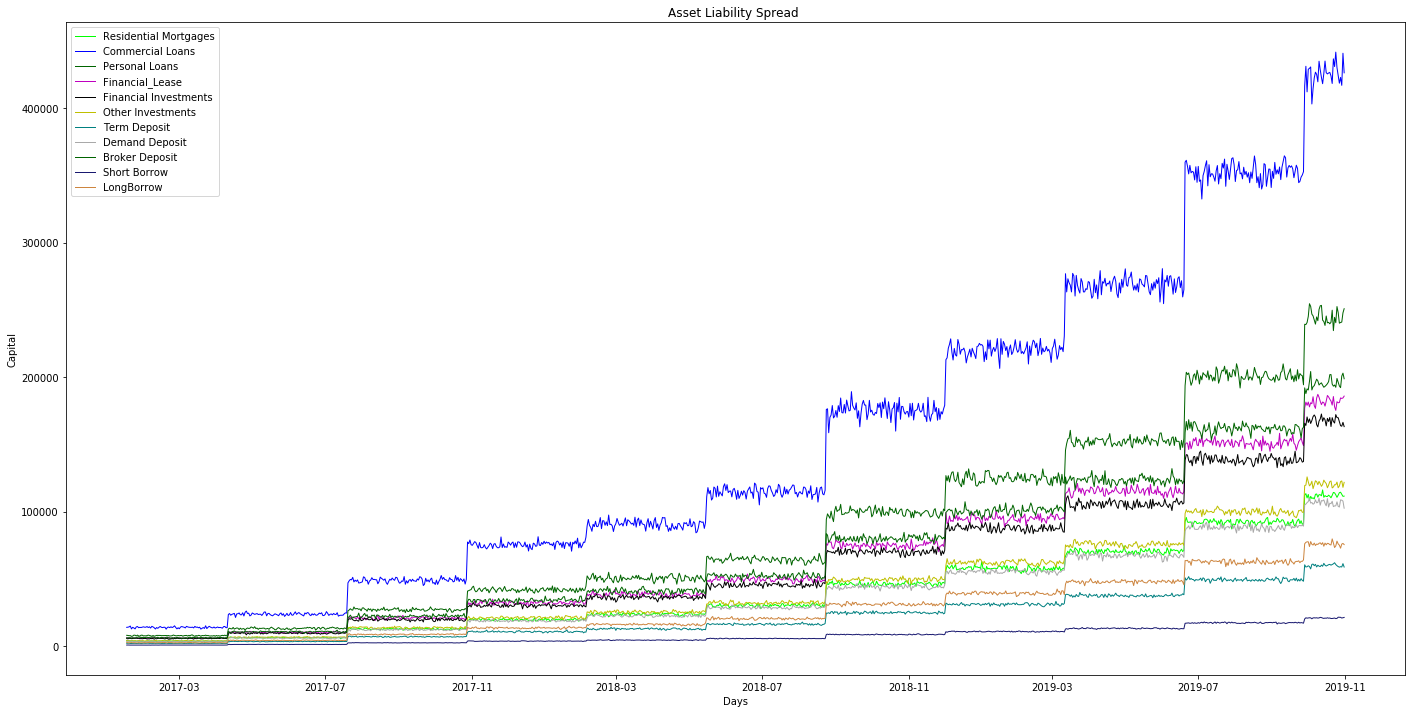

In [25]:
#Creates a Plot of the Difference between Assets and Liabilities
def spread_diagram(sp_df):   
    plt.figure(figsize = (24,12))
    plt.plot(sp_df.Dec_Residential_Mortgages, label = 'Residential Mortgages', color = 'lime', linewidth =1 )
    plt.plot(sp_df.Dec_Commercial_Loans, label = 'Commercial Loans', color = 'b', linewidth =1 )
    plt.plot(sp_df.Dec_Personal_Loans, label = 'Personal Loans', color = 'darkgreen', linewidth =1 )
    plt.plot(sp_df.Dec_Financial_Lease, label = 'Financial_Lease', color = 'm', linewidth =1 )
    plt.plot(sp_df.Dec_Financial_Investments, label = 'Financial Investments', color = 'k', linewidth =1 )
    plt.plot(sp_df.Dec_Other_Investments, label = 'Other Investments', color = 'y', linewidth =1 )
    #plt.plot(sp_df.Dec_Cash_Equivalent, label = 'Cash Equivalent', color = 'skyblue', linewidth =1 )
    #plt.plot(sp_df.Dec_Inventories, label = 'Inventories', color = 'c', linewidth =1 )
    #plt.plot(sp_df.Dec_Intangible_Assets, label = 'Intangible Assets', color = 'firebrick', linewidth =1 )
    #plt.plot(sp_df.Dec_Other_Receivables, label = 'Other Receivables', color = 'pink', linewidth =1 )
    plt.plot(sp_df.Inc_Term_Deposit, label = 'Term Deposit', color = 'teal', linewidth =1 )
    plt.plot(sp_df.Inc_Demand_Deposit, label = 'Demand Deposit', color = 'darkgray', linewidth =1 )
    plt.plot(sp_df.Inc_Broker_Deposit, label = 'Broker Deposit', color = 'darkgreen', linewidth =1 )
    plt.plot(sp_df.Inc_Short_Borrow, label = 'Short Borrow', color = 'midnightblue', linewidth =1 )
    plt.plot(sp_df.Inc_Long_Borrow, label = 'LongBorrow', color = 'peru', linewidth =1 )
    #plt.plot(sp_df.Inc_Other_Payable, label = 'Other Payable', color = 'dodgerblue', linewidth =1 )
    #plt.plot(sp_df.Inc_NonInterest_Liabilities, label = 'NonInterest_Liabilities', color = 'deeppink', linewidth =1 )



    plt.xlabel('Days')
    plt.ylabel('Capital')

    plt.title("Asset Liability Spread ")

    plt.legend()

    plt.show()
    return
spread_diagram(sp_df)

In [26]:
def create_data_set(assets, name, stress ):
    ds_ap = assets_portfolio(assets, name)
    ds_lp = liabilities_portfolio(assets, name)
    ds_full = combine_portfolios(ds_ap,ds_lp)
    ds_full = ds_full.iloc[15:,:]
    ds_stress = equity_risk_df(stress)
    ds_sp = spread_df(ds_stress, ds_full)
    return ds_sp
data1 = create_data_set(1000000, 'Edward', 0.005 )
data2 = create_data_set(500000, 'Jeff', 0.065 )
data3 = create_data_set(7500000, 'Sarabi', 0.025 )
data4 = create_data_set(500000, 'Kate', 0.033 )
data5 = create_data_set(100000, 'Megan', 0.045 )
data6 = create_data_set(8800000, 'Elizabeth', 0.028 )
data7 = create_data_set(6500000, 'Steven', 0.0329 )
data8 = create_data_set(2500000, 'Lyn', 0.015 )
data9 = create_data_set(5200000, 'Lemon', 0.095 )
data10 = create_data_set(1600000, 'Tori', 0.057 )
frames = [data1, data2, data3, data4, data5,data6, data7, data8, data9, data10]
data = pd.concat(frames)
data.shape

(10190, 21)

In [27]:
data1.head(1)

Dec_Residential_Mortgages  Dec_Commercial_Loans  \
datetime                                                      
2017-01-16                  -106674.9            -252587.27   

            Dec_Personal_Loans  Dec_Financial_Lease  \
datetime                                              
2017-01-16          -213760.45           -134337.46   

            Dec_Financial_Investments  Dec_Other_Investments  Dec_Inventories  \
datetime                                                                        
2017-01-16                 -112042.09             -102421.88        -17829.02   

            Dec_Intangible_Assets  Dec_Cash_Equivalent  Dec_Other_Receivables  \
datetime                                                                        
2017-01-16             -105833.29            -56347.18             -214225.46   

                  ...          Inc_Demand_Deposit  Inc_Broker_Deposit  \
datetime          ...                                                   
2017-01-16        ...                   108618.39           184146.31   

            Inc_Short_Borrow  Inc_Long_Borrow  Inc_NonInterest_Liabilities  \
datetime                                                                     
2017-01-16          19420.34         71915.39                     48399.02   

            Inc_Other_Payable  Total_Assets  Total_Liability      Spread  \
datetime                                                                   
2017-01-16          111819.78    -1316059.0        599910.45 -1915969.45   

            Spread_Percentage  
datetime                       
2017-01-16           1.455839  

[1 rows x 21 columns]

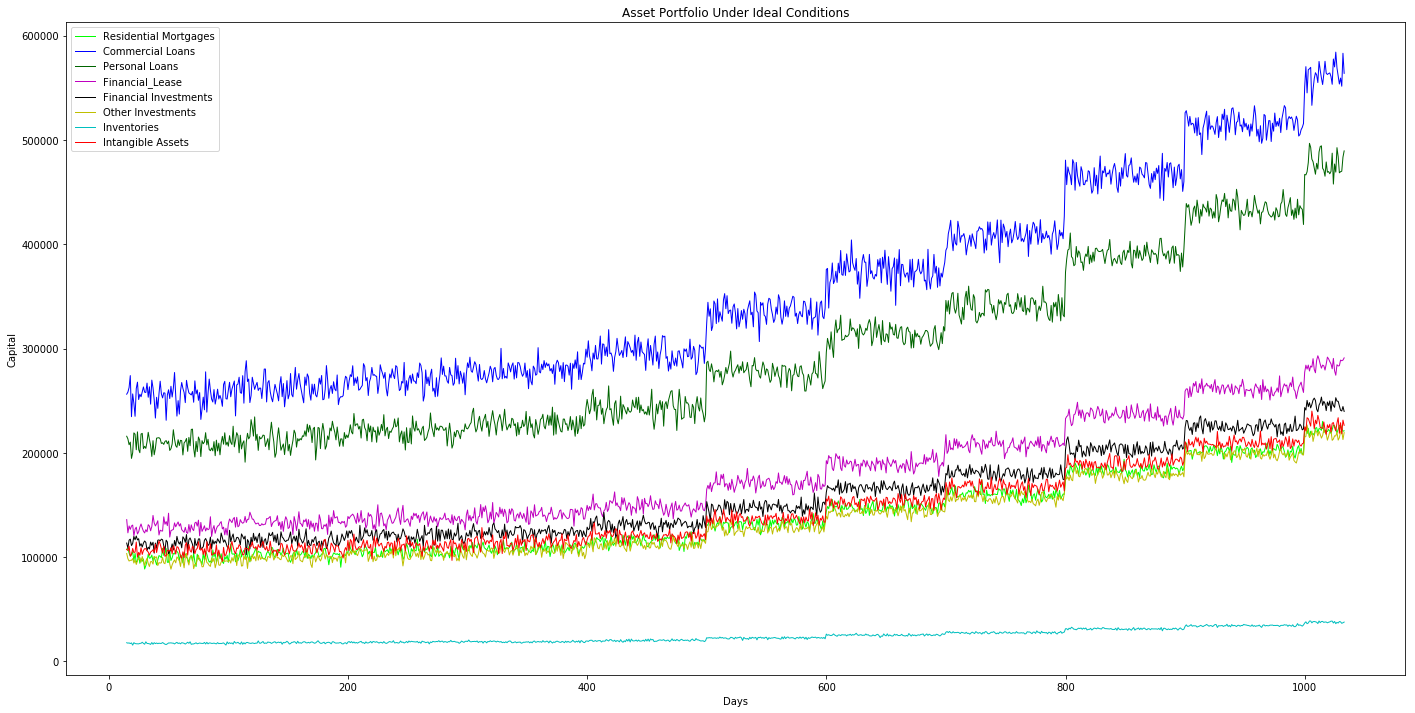

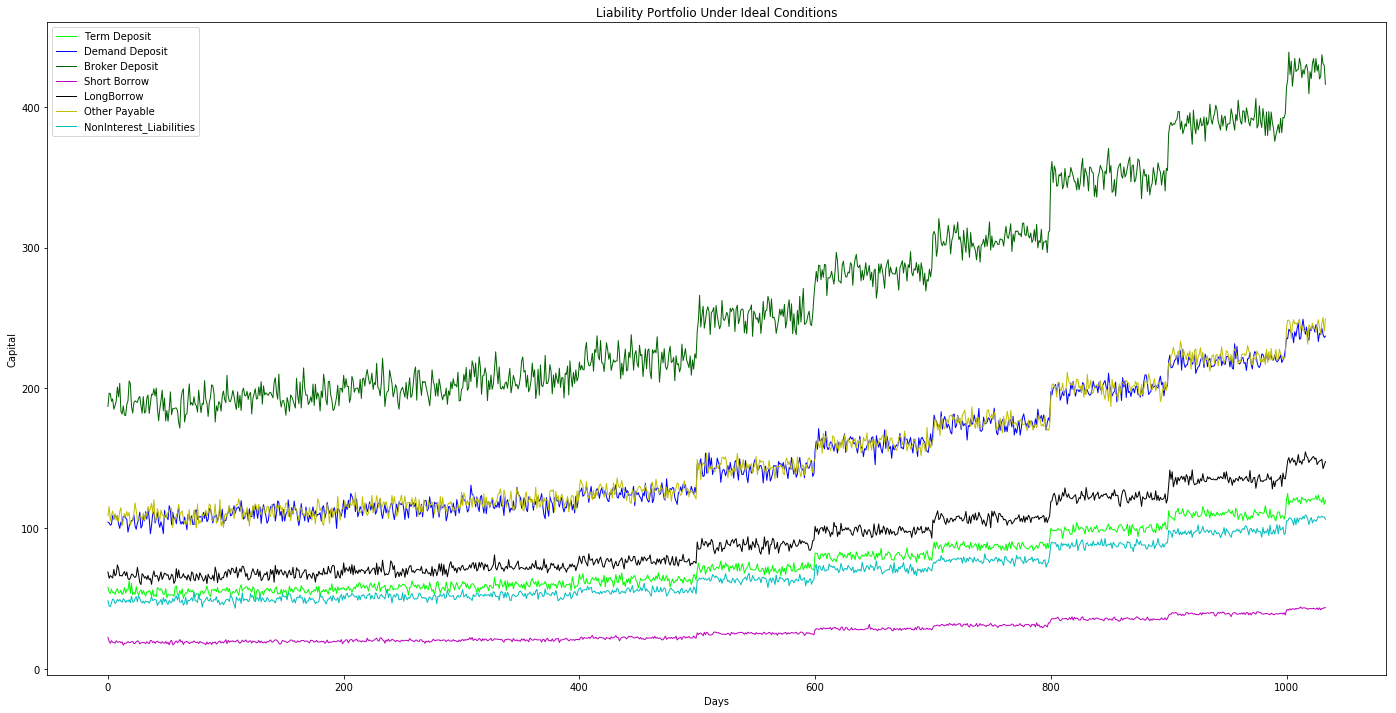

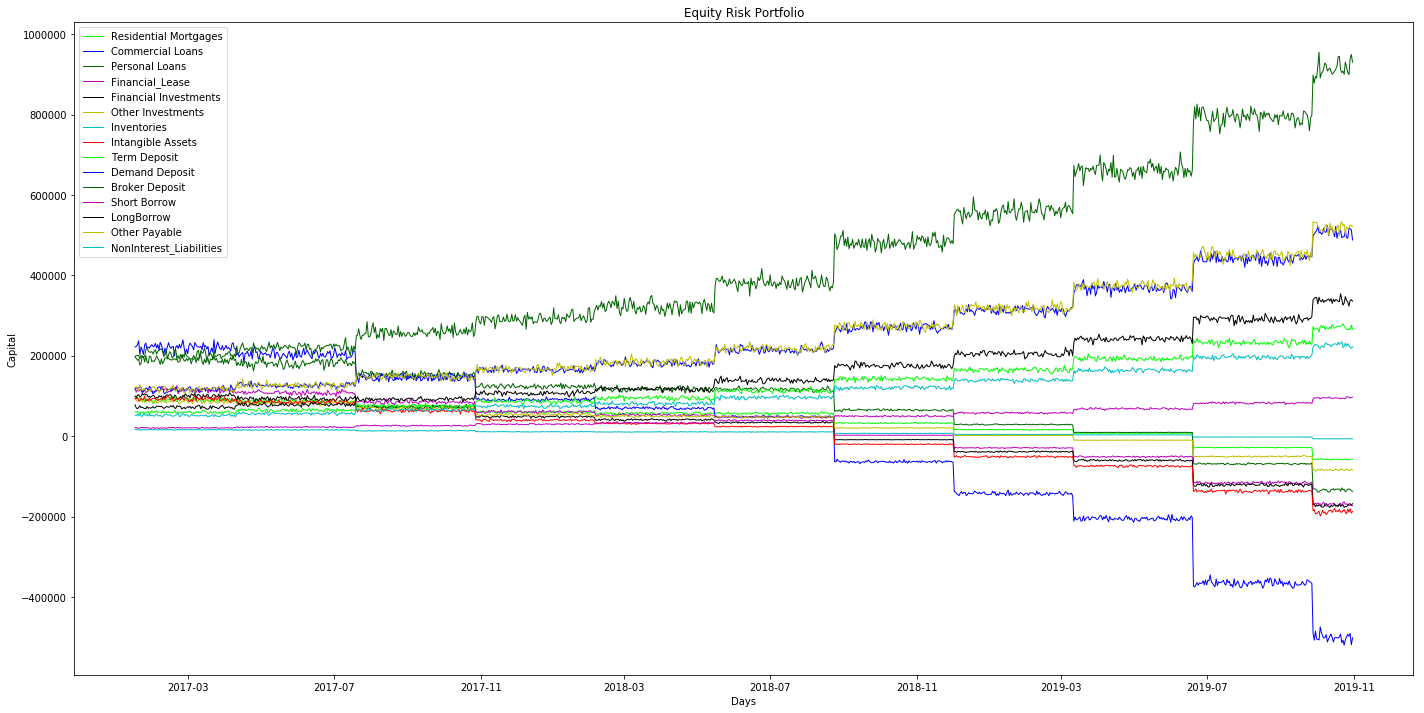

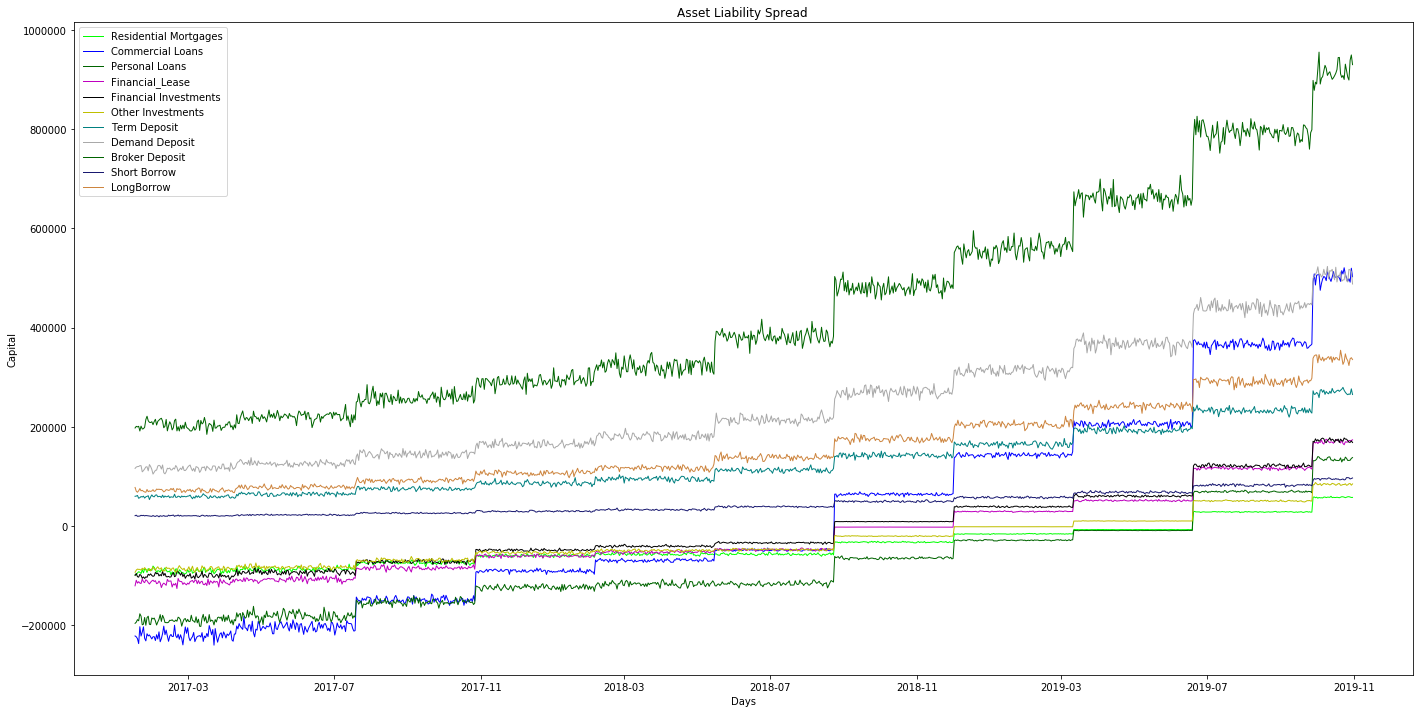

In [28]:
def create_forcasts(assets, name, stress) :
    ap_df = assets_portfolio(assets, name)
    lb_df = liabilities_portfolio(assets, name)
    df = combine_portfolios(ap_df,lb_df)
    df = df.iloc[15:,:]
    er_df = equity_risk_df(stress)
    sp_df = spread_df(er_df, df)
    asset_diagram(as_por)
    liability_diagram(lb_df)
    equity_stress_diagram(er_df)
    spread_diagram(sp_df)
    return
df_data =create_forcasts(1000000, 'Edward', 0.05)

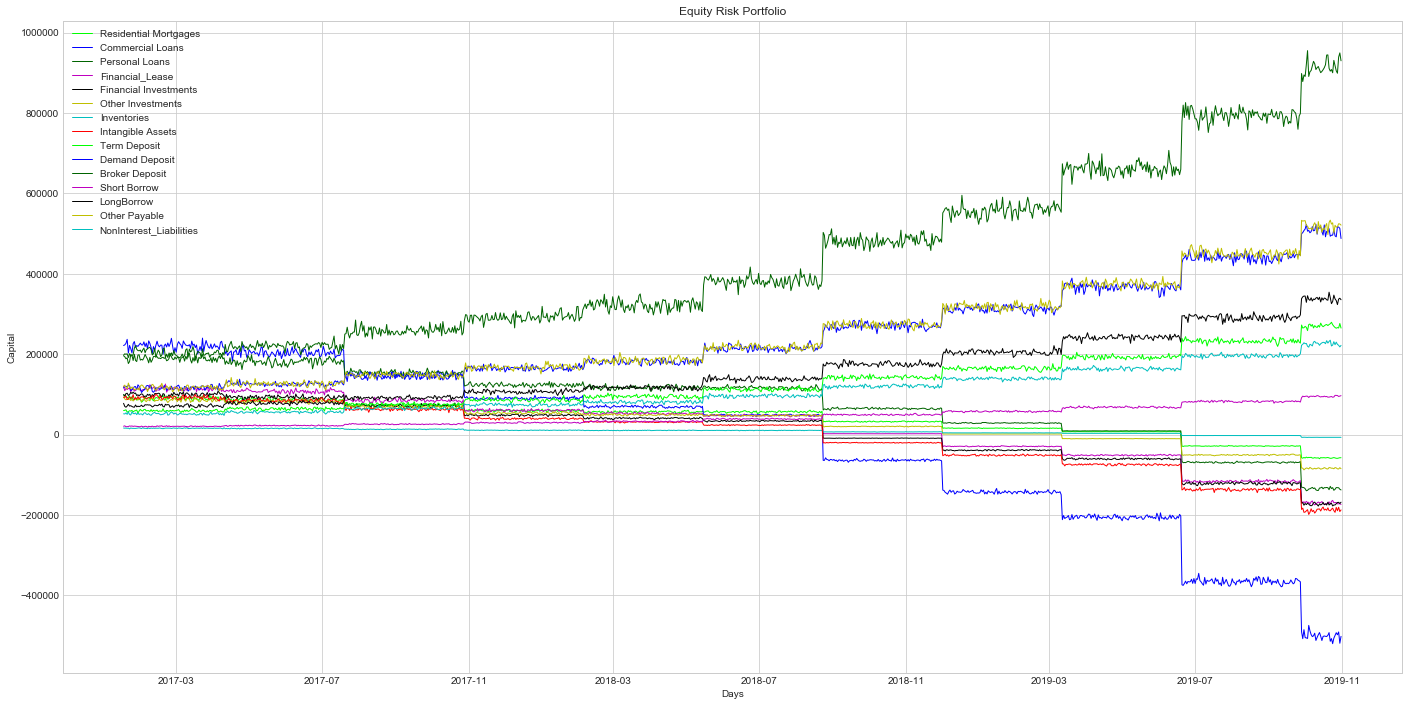

In [29]:
def create_forcasts(assets, name, stress) :
    ap_df = assets_portfolio(assets, name)
    lb_df = liabilities_portfolio(assets, name)
    df = combine_portfolios(ap_df,lb_df)
    df = df.iloc[15:,:]
    er_df = equity_risk_df(stress)
    sp_df = spread_df(er_df, df)
    #asset_diagram(as_por)
    #liability_diagram(lb_df)
    equity_stress_diagram(er_df)
    #spread_diagram(sp_df)
    return
plt.style.use('seaborn-whitegrid')
df_data =create_forcasts(1000000, 'Edward', 0.05)

In [3]:
#Simulations

In [30]:
assets = 1000000
name = 'Edwards_Trust_Fund'
term= [1]*len(dates)
asset_port = pd.DataFrame()

In [31]:
#This function is recursive and updates itself after every day
#reallocating assets according to Asset-Liability Portfolio
def asset_portfolio_s(assets, name, term):
    if not term:
        return asset_port
    
    else:
        RM = assets*0.30 

        RMmu = RM *0.35
        RMrate = 0.07
        asset_port['Residential_Mortgages'] = random_time_series( RM , RMmu , RMrate )
        
           
        CL = assets*0.20 
        CLmu = CL *0.15   
        CLrate = 0.049
        asset_port['Commercial_Loans'] = random_time_series(CL, CLmu, CLrate)

        PL = assets*0.150 
        PLmu = PL*.3860
        PLrate = 0.135
        asset_port['Personal_Loans'] = random_time_series(PL, PLmu, PLrate)


        FL = assets*0.05 
        FLmu = FL *0.250
        FLrate = 0.059
        asset_port['Financial_Lease'] = random_time_series(FL, FLmu, FLrate)


        FI = assets*0.15 
        FImu = FI*0.1506
        FIrate = 0.0025
        asset_port['Financial_Investments'] = random_time_series(FI, FImu, FIrate)

        OI = assets*0.05 
        OImu = OI*0.609
        OIrate = 0.101
        asset_port['Other_Investments'] = random_time_series(OI, OImu, OIrate)

        I = assets*0.01 
        Imu = I *0.656
        Irate = 0.0046
        asset_port['Inventories'] = random_time_series(I, Imu, Irate)

        IA = assets*0.03 
        IAmu = IA *0.0325
        IArate = 0.0095
        asset_port['Intangible_Assets'] = random_time_series(IA, IAmu, IArate)

        CE = assets*0.04 
        CEmu = CE *0.0750
        CErate = 0.048
        asset_port['Cash_Equivalent'] = random_time_series(CE, CEmu, CErate)

        OR = assets*0.02 
        ORmu = OR *0.05103
        ORrate = 0.0078
        asset_port['Other_Receivables'] = random_time_series(OR, ORmu, ORrate)


        assets = asset_port['Residential_Mortgages'][1]+ asset_port['Commercial_Loans'][1]+asset_port['Personal_Loans'][1]+asset_port['Financial_Lease'][1]+asset_port['Financial_Investments'][1]+asset_port['Other_Investments'][1]+asset_port['Inventories'][1]+asset_port['Intangible_Assets'][1]+asset_port['Cash_Equivalent'][1]+asset_port['Other_Receivables'][1]
           
    
    
    return asset_portfolio_s(assets, name, term[1:])




In [32]:
ap = asset_portfolio_s(100000000, 'Edward', term)

ap.head()

Residential_Mortgages  Commercial_Loans  Personal_Loans  Financial_Lease  \
0               3.247935          2.141993        5.821423         2.515061   
1               0.503992          0.190597        0.939764         0.182826   
2               0.317741          0.093525        0.282463         0.045895   
3               0.299552          0.083474        0.179242         0.035224   
4               0.311549          0.090674        0.183512         0.033781   

   Financial_Investments  Other_Investments  Inventories  Intangible_Assets  \
0               0.172821           4.328274     0.210610           0.401893   
1               0.064238           0.518103     0.019417           0.006542   
2               0.063653           0.133302     0.019734           0.002794   
3               0.067492           0.094454     0.018321           0.002971   
4               0.064658           0.087082     0.020148           0.002859   

   Cash_Equivalent  Other_Receivables  
0         2.024593           0.330550  
1         0.105462           0.005582  
2         0.013618           0.002848  
3         0.008683           0.002888  
4         0.008939           0.003014

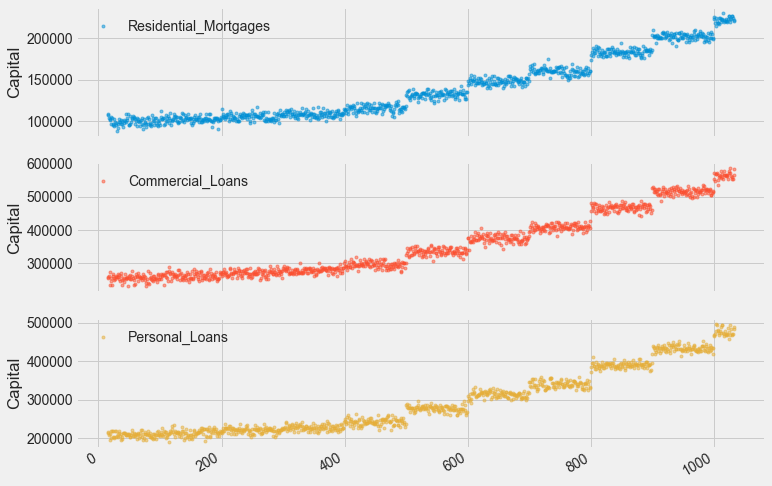

In [33]:
import matplotlib.dates as mdates
plt.style.use('fivethirtyeight')
cols_plot = ['Residential_Mortgages', 'Commercial_Loans', 'Personal_Loans']
axes = as_por[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Capital')
    ax.xaxis.set_minor_locator( mdates.MonthLocator())

Text(0,0.5,'Capital')

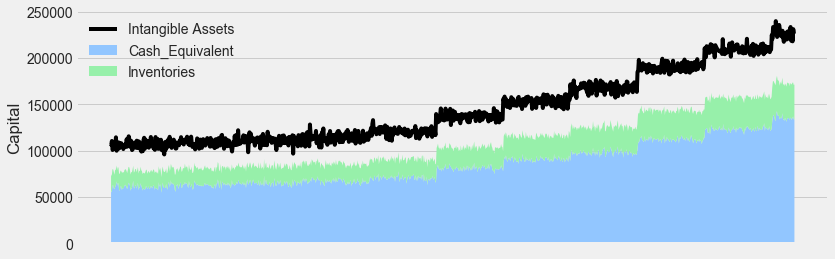

In [34]:

plt.style.use('seaborn-pastel')
fig, ax = plt.subplots(figsize = (12,4))




ax.plot(as_por['Intangible_Assets'], color='black', label='Intangible Assets')
as_por[['Cash_Equivalent', 'Inventories']].plot.area(ax=ax, linewidth=0)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Days')
ax.set_ylabel('Capital')

Text(0.5,1,'Residential Mortgages')

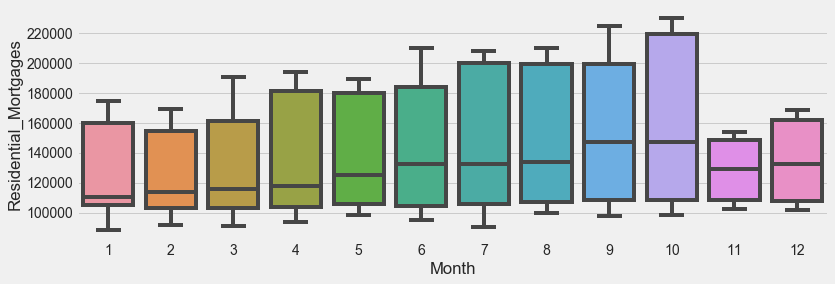

In [38]:
import seaborn as sns
as_por['datetime']= pd.to_datetime(as_por['date'])
as_por = as_por.set_index('datetime')
asset_portfol= as_por
as_por['Month'] = as_por.index.month
as_por['Year'] = as_por.index.year
asset_portfol = as_por
asset_portfol['Month'] = asset_portfol.index.month
#fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
#for name, ax in zip(['Residential_Mortgages','Commercial_Loans','Personal_Loans'], axes):
plt.figure(figsize= (12,4))
sns.boxplot(data=asset_portfol, x='Month', y='Residential_Mortgages')
ax.set_ylabel('Capital')
ax.set_title('Residential Mortgages')

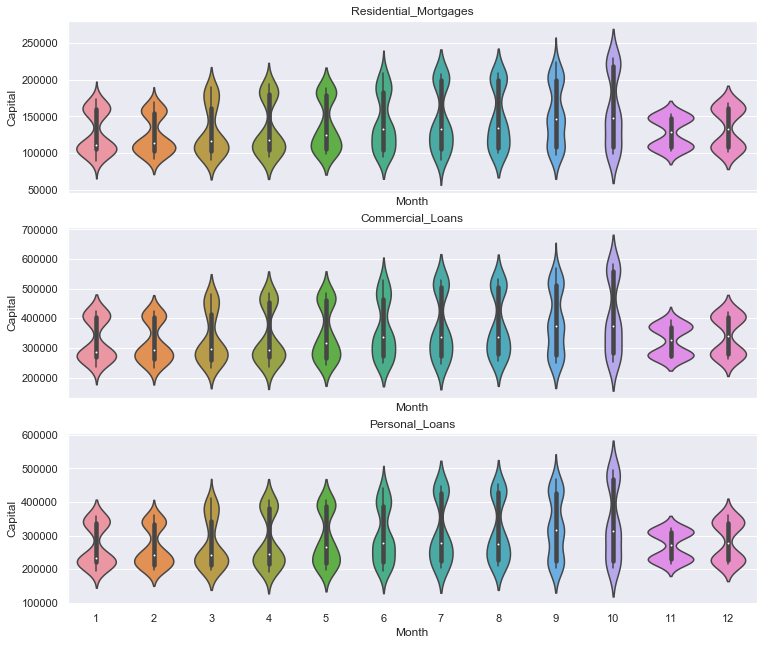

In [39]:

sns.set(rc={'figure.figsize':(12, 4)})
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Residential_Mortgages','Commercial_Loans','Personal_Loans'], axes):
    plt.style.use('seaborn-muted')
    sns.violinplot(data=asset_portfol, x='Month', y=name, ax=ax)
    ax.set_ylabel('Capital')
    ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')

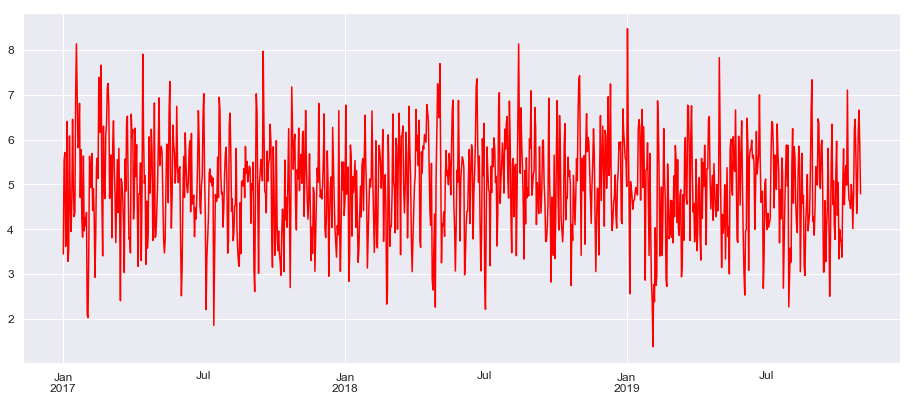

In [40]:
#Create a Moving Average to Prove Stability 

mu = 5
theta = 0.43



def moving_average (TS, mu , theta ):
    error = np.random.normal(0,1,len(dates))
    error_prev = error[0]
    
    for i, row in enumerate(dates):
        TS[i] = mu + theta * error_prev +error[i]
        error_prev = error[i]
    MA = TS
    return MA
#Function Test
np.random.seed(123)
vanilla_ma = moving_average(vanilla_ts, mu , theta )
series = pd.Series(vanilla_ma, index=dates)
series.plot(figsize=(14,6), linewidth = 1.5, fontsize= 12, color = 'red')

In [41]:


asset_portfol['datetime'] = pd.to_datetime(asset_portfol['date'])
asset_portfol = asset_portfol.set_index('datetime')
asset_portfol = asset_portfol.drop(['name', 'date'], axis =1)
asset_portfol['Year'] = asset_portfol.index.year
# Compute the annual sums, setting the value to NaN for any year which has
# fewer than 360 days of data
data_columns = asset_portfol.columns
asset_portfol_annual = asset_portfol[data_columns].resample('A').sum(min_count=360)

asset_portfol_annual = asset_portfol_annual.set_index(asset_portfol_annual.index.year)
asset_portfol_annual.index.name = 'Year'


asset_portfol_annual.tail(3)

Residential_Mortgages  Commercial_Loans  Personal_Loans  \
Year                                                            
2017                    NaN               NaN             NaN   
2018            48223138.76      1.225785e+08    1.015386e+08   
2019                    NaN               NaN             NaN   

      Financial_Lease  Financial_Investments  Other_Investments  Inventories  \
Year                                                                           
2017              NaN                    NaN                NaN          NaN   
2018      62100133.72            54248105.77        46853044.48   8287221.34   
2019              NaN                    NaN                NaN          NaN   

      Intangible_Assets  Cash_Equivalent  Other_Receivables   Month      Year  
Year                                                                           
2017                NaN              NaN                NaN     NaN       NaN  
2018        50161635.88       29654622.9       1.059672e+08  2382.0  736570.0  
2019                NaN              NaN                NaN     NaN       NaN

In [42]:
# Resample to weekly frequency, aggregating with mean
asset_portfol_weekly_mean = asset_portfol[data_columns].resample('W').mean()


# Compute the annual sums, setting the value to NaN for any year which has
# fewer than 360 days of data
asset_portfol_annual = asset_portfol[data_columns].resample('A').sum(min_count=360)

asset_portfol_annual = asset_portfol_annual.set_index(asset_portfol_annual.index.year)
asset_portfol_annual.index.name = 'Year'
asset_portfol_annual.tail(3)

Residential_Mortgages  Commercial_Loans  Personal_Loans  \
Year                                                            
2017                    NaN               NaN             NaN   
2018            48223138.76      1.225785e+08    1.015386e+08   
2019                    NaN               NaN             NaN   

      Financial_Lease  Financial_Investments  Other_Investments  Inventories  \
Year                                                                           
2017              NaN                    NaN                NaN          NaN   
2018      62100133.72            54248105.77        46853044.48   8287221.34   
2019              NaN                    NaN                NaN          NaN   

      Intangible_Assets  Cash_Equivalent  Other_Receivables   Month      Year  
Year                                                                           
2017                NaN              NaN                NaN     NaN       NaN  
2018        50161635.88       29654622.9       1.059672e+08  2382.0  736570.0  
2019                NaN              NaN                NaN     NaN       NaN

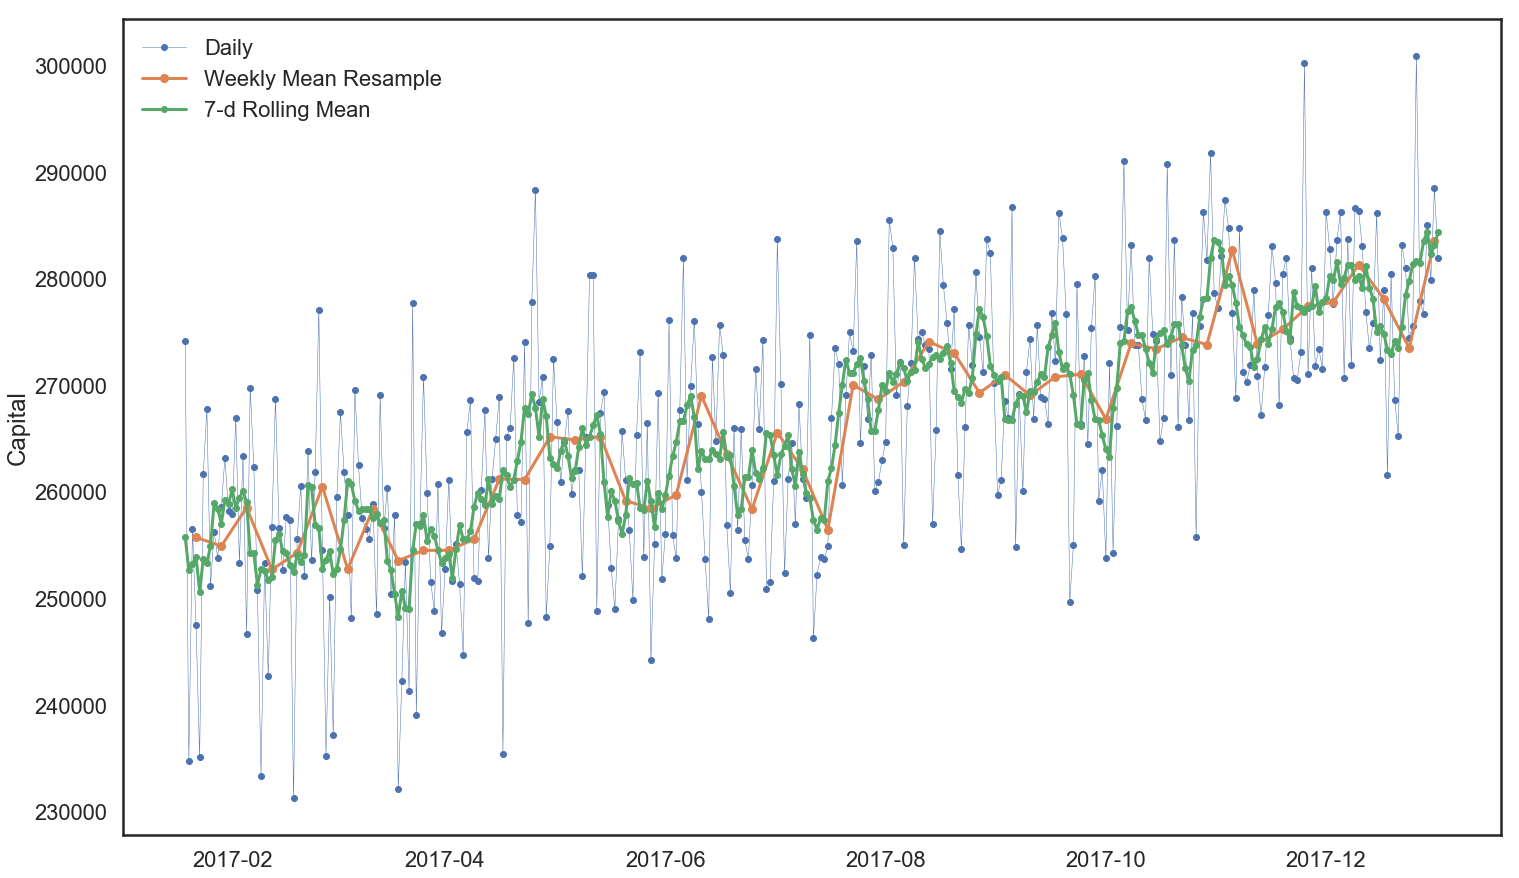

In [47]:
#Creating Plot for Rolling Mean and Weekly Mean
asset_portfol= as_por
asset_portfol['datetime'] = pd.to_datetime(asset_portfol['date'])
asset_portfol = asset_portfol.set_index('datetime')
asset_portfol = asset_portfol.drop(['name', 'date'], axis =1)
asset_portfol_7d = asset_portfol[data_columns].rolling(7, center=True).mean()
asset_portfol_30d = asset_portfol[data_columns].rolling(30, center=True).mean()
# Resample to weekly frequency, aggregating with mean
asset_portfol_weekly_mean = asset_portfol[data_columns].resample('W').mean()

# Start and end of the date range to extract
start, end = '2017-01-19', '2018-01-01'
# Plot daily, weekly resampled, and 7-day rolling mean time series together
fig, ax = plt.subplots()
sns.set_style("dark")
ax.plot(asset_portfol.loc[start:end, 'Commercial_Loans'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(asset_portfol_weekly_mean.loc[start:end, 'Commercial_Loans'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.plot(asset_portfol_7d.loc[start:end, 'Commercial_Loans'],
marker='.', linestyle='-', label='7-d Rolling Mean')
ax.set_ylabel('Capital')
ax.legend()

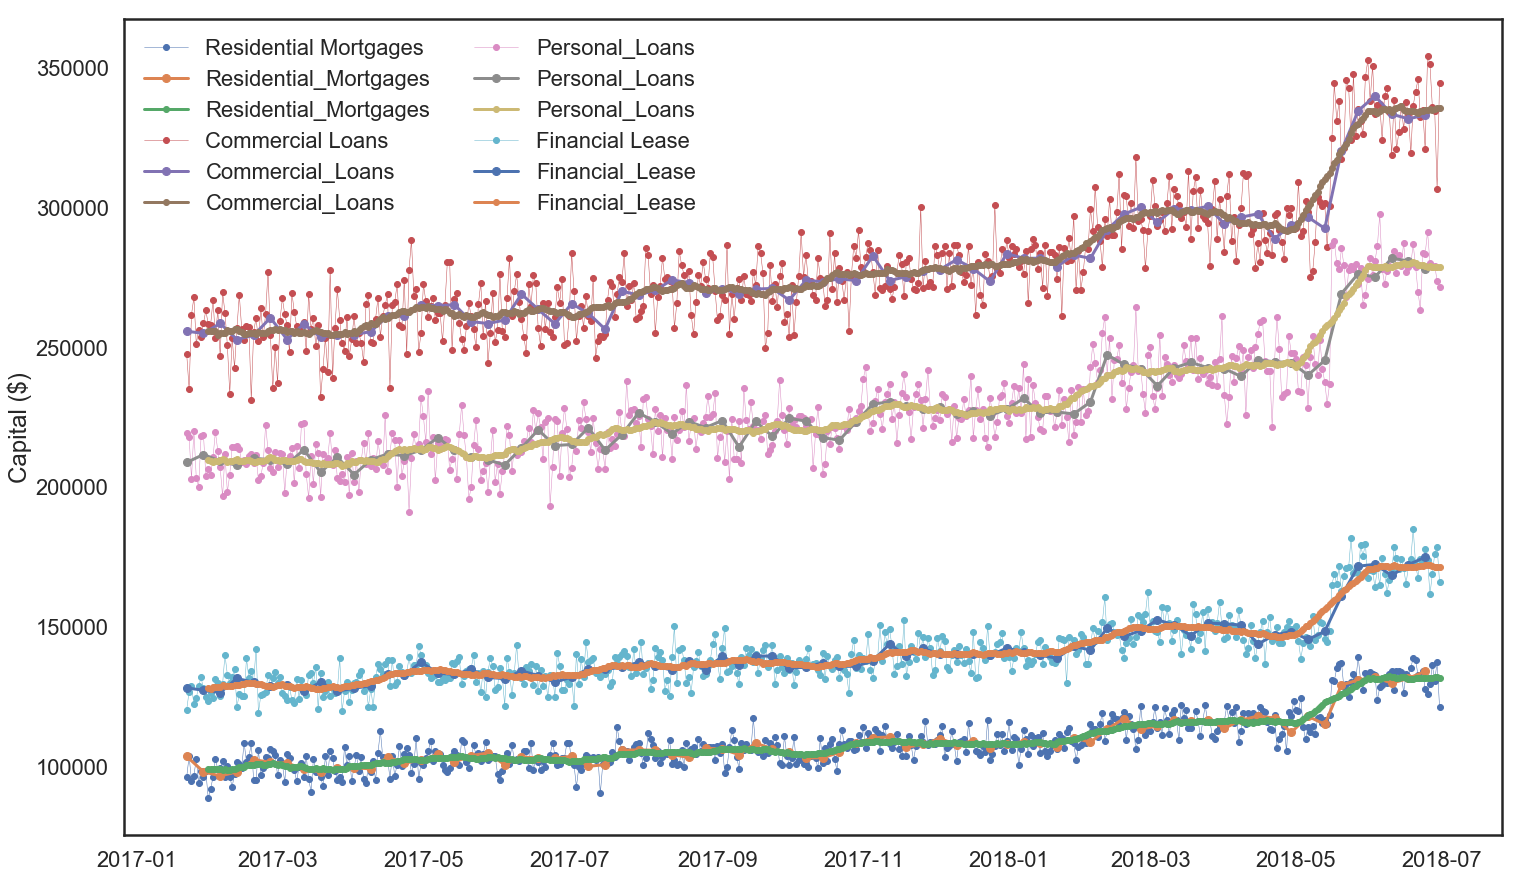

In [48]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(22, 14)})
sns.set_style("white")
sns.set_context("poster")
# Start and end of the date range to extract
start, end = '2017-01-22', '2018-06'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()

ax.plot(asset_portfol.loc[start:end, 'Residential_Mortgages'],
marker='.', linestyle='-', linewidth=0.5, label='Residential Mortgages')
ax.plot(asset_portfol_weekly_mean.loc[start:end, 'Residential_Mortgages'],
marker='o', markersize=8, linestyle='-')
ax.plot(asset_portfol_30d.loc[start:end, 'Residential_Mortgages'],
marker='.', linestyle='-')

ax.plot(asset_portfol.loc[start:end, 'Commercial_Loans'],
marker='.', linestyle='-', linewidth=0.5, label='Commercial Loans')
ax.plot(asset_portfol_weekly_mean.loc[start:end, 'Commercial_Loans'],
marker='o', markersize=8, linestyle='-')
ax.plot(asset_portfol_30d.loc[start:end, 'Commercial_Loans'],
marker='.', linestyle='-')

ax.plot(asset_portfol.loc[start:end, 'Personal_Loans'],
marker='.', linestyle='-', linewidth=0.5, label='Personal_Loans')
ax.plot(asset_portfol_weekly_mean.loc[start:end, 'Personal_Loans'],
marker='o', markersize=8, linestyle='-')
ax.plot(asset_portfol_30d.loc[start:end, 'Personal_Loans'],
marker='.', linestyle='-')

ax.plot(asset_portfol.loc[start:end, 'Financial_Lease'],
marker='.', linestyle='-', linewidth=0.5, label='Financial Lease')
ax.plot(asset_portfol_weekly_mean.Financial_Lease.loc[start:end, ],
marker='o', markersize=8, linestyle='-')
ax.plot(asset_portfol_30d.loc[start:end, 'Financial_Lease'],
marker='.', linestyle='-')


ax.set_ylabel('Capital ($)')
ax.legend(frameon=False, loc='upper left', ncol=2, shadow=True,fancybox=True,framealpha=1 )

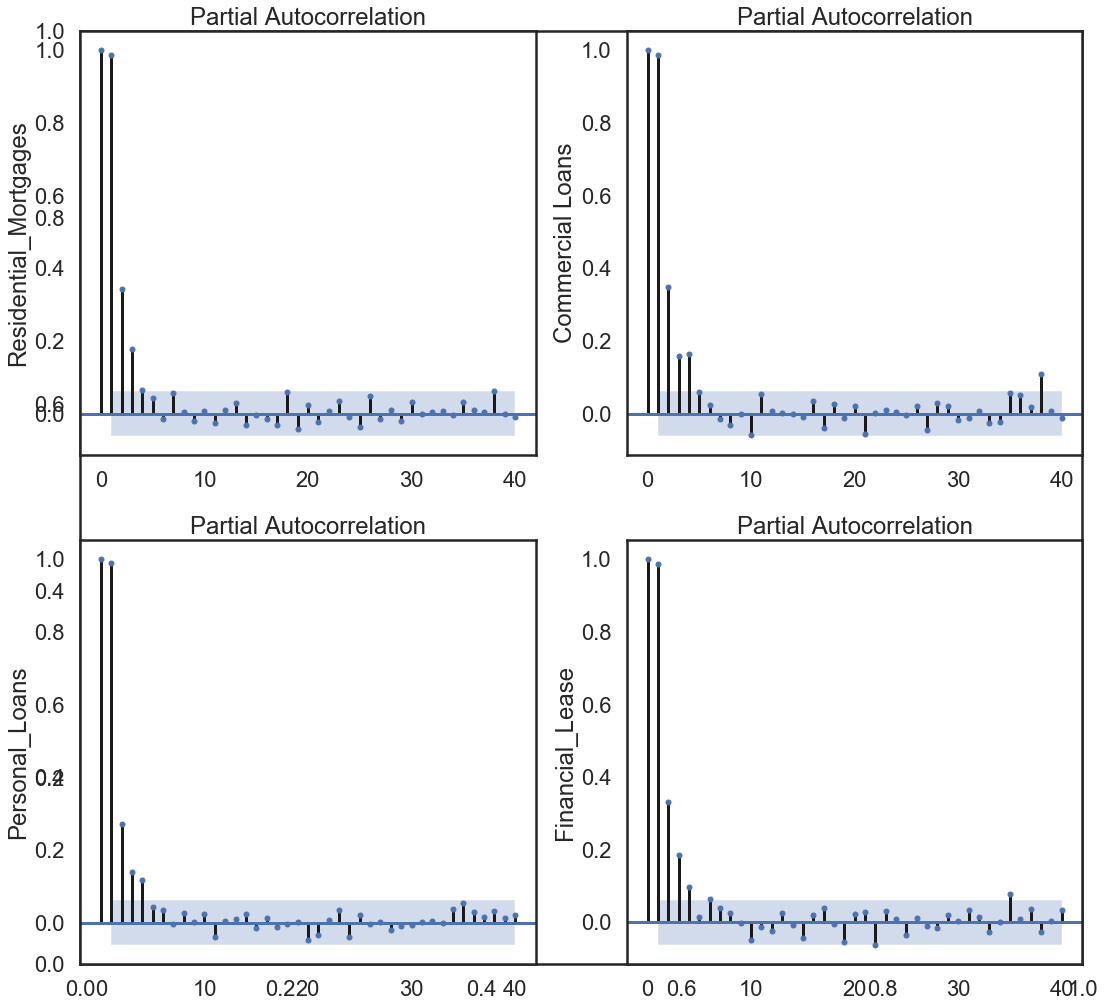

In [49]:

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
    
def partial_autocorrelation(asset_portfol):
    fig, ax = plt.subplots(figsize=(16,16))
    ax1 =fig.add_subplot(221)
    ax2 =fig.add_subplot(222)
    ax3 =fig.add_subplot(223)
    ax4 =fig.add_subplot(224)
    ax1.set_ylabel('Residential_Mortgages')
    plot_acf(asset_portfol.Residential_Mortgages.values,ax=ax1, lags=40)
    ax2.set_ylabel('Commercial Loans')
    plot_acf(asset_portfol.Commercial_Loans.values,ax=ax2, lags=40)
    
    
    ax3.set_ylabel('Personal_Loans')
    plot_acf(asset_portfol.Personal_Loans.values,ax=ax3, lags=40)
    ax4.set_ylabel('Financial_Lease')
    plot_acf(asset_portfol.Financial_Lease.values,ax=ax4, lags=40)
    plt.show()
    return


def autocorrelation(asset_portfol):
    fig, ax = plt.subplots(figsize=(16,16))
    ax1 =fig.add_subplot(221)
    ax2 =fig.add_subplot(222)
    ax3 =fig.add_subplot(223)
    ax4 =fig.add_subplot(224)
    ax1.set_ylabel('Residential_Mortgages')
    plot_pacf(asset_portfol.Residential_Mortgages.values,ax=ax1, lags=40)
    ax2.set_ylabel('Commercial Loans')
    plot_pacf(asset_portfol.Commercial_Loans.values,ax=ax2, lags=40)
    
    
    ax3.set_ylabel('Personal_Loans')
    plot_pacf(asset_portfol.Personal_Loans.values,ax=ax3, lags=40)
    ax4.set_ylabel('Financial_Lease')
    plot_pacf(asset_portfol.Financial_Lease.values,ax=ax4, lags=40)
    plt.show()
    return

autocorrelation(asset_portfol)





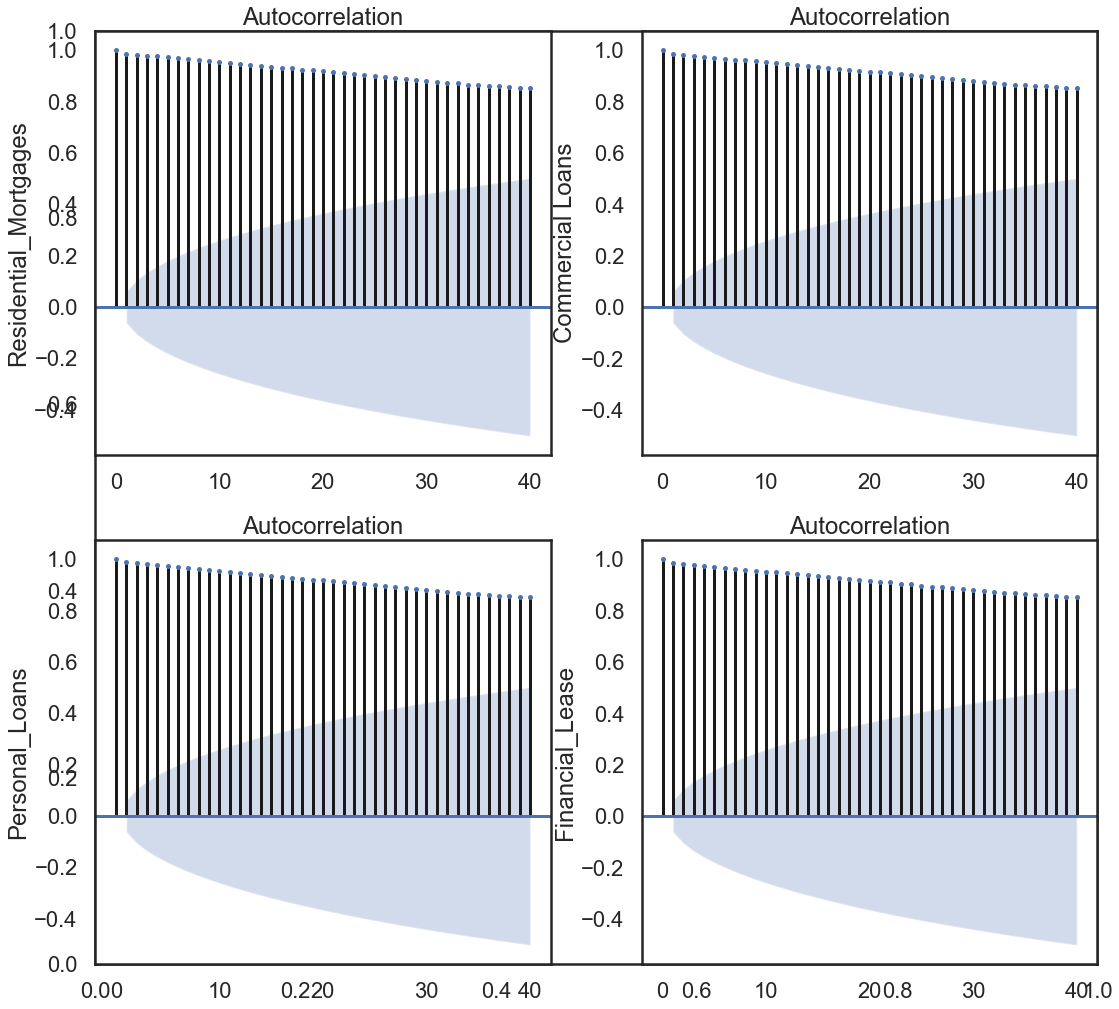

In [164]:
partial_autocorrelation(asset_portfol)

In [50]:
#ARIMA Model 
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

def ARIMA(TS):
    
    mod_arma = ARMA(TS, order=(0,1))
    res_arma = mod_arma.fit()

    return print(res_arma.summary())
print(' ')
print(' ')
print(' ')
print(' ')
print('Residential Mortgages')
print(ARIMA(asset_portfol.Residential_Mortgages.values))
print(' ')
print(' ')
print(' ')
print(' ')
print('Commercial_Loans')
print(ARIMA(asset_portfol.Commercial_Loans.values))
print(' ')
print(' ')
print(' ')
print(' ')
print('Personal Loans')
print(ARIMA(asset_portfol.Personal_Loans.values))

 
 
 
 
Residential Mortgages
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1019
Model:                     ARMA(0, 1)   Log Likelihood              -11587.887
Method:                       css-mle   S.D. of innovations          20997.155
Date:                Sun, 10 Nov 2019   AIC                          23181.774
Time:                        17:38:52   BIC                          23196.554
Sample:                             0   HQIC                         23187.386
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.392e+05   1237.917    112.408      0.000    1.37e+05    1.42e+05
ma.L1.y        0.8829      0.010     88.033      0.000       0.863       0.903
                      

In [51]:
import plotly_express as px
from IPython.core.interactiveshell import InteractiveShell
# Plot imports
import plotly.graph_objects as go
import plotly as py
## Offline mode
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import seaborn as sns
plt.style.use('bmh')

In [54]:
as_por.head()

date                name  Residential_Mortgages  \
datetime                                                           
2017-01-16 2017-01-16  Edwards_Trust_Fund              107745.40   
2017-01-17 2017-01-17  Edwards_Trust_Fund              108378.29   
2017-01-18 2017-01-18  Edwards_Trust_Fund              103906.25   
2017-01-19 2017-01-19  Edwards_Trust_Fund              101233.83   
2017-01-20 2017-01-20  Edwards_Trust_Fund              102387.78   

            Commercial_Loans  Personal_Loans  Financial_Lease  \
datetime                                                        
2017-01-16         256292.69       215963.61        136023.78   
2017-01-17         258290.07       213425.50        123348.06   
2017-01-18         262693.60       207801.35        129944.17   
2017-01-19         274122.34       210312.55        126667.59   
2017-01-20         234755.81       194721.44        129921.52   

            Financial_Investments  Other_Investments  Inventories  \
datetime                                                            
2017-01-16              113536.16          103545.05     17996.79   
2017-01-17              108736.11           98550.10     17589.61   
2017-01-18              116307.16           96317.20     17809.78   
2017-01-19              117339.11           97018.56     17178.71   
2017-01-20              111110.44           96986.95     17818.36   

            Intangible_Assets  Cash_Equivalent  Other_Receivables  Month  \
datetime                                                                   
2017-01-16          107350.16         57115.21          216592.97      1   
2017-01-17          106445.00         55541.88          228781.68      1   
2017-01-18          110572.57         62598.66          221405.45      1   
2017-01-19          100831.15         63484.10          232662.09      1   
2017-01-20          102719.96         59962.06          225855.05      1   

            Year   datetime  
datetime                     
2017-01-16  2017 2017-01-16  
2017-01-17  2017 2017-01-17  
2017-01-18  2017 2017-01-18  
2017-01-19  2017 2017-01-19  
2017-01-20  2017 2017-01-20

In [52]:
RM_series =as_por.Residential_Mortgages
CM_series =as_por.Commercial_Loans

RM_data = go.Scatter(x=RM_series.index ,
                        y=RM_series.values, name='Residential_Mortgages')
CM_data = go.Scatter(x=CM_series.index ,
                        y=CM_series.values, name = 'Commercial_Loans')
layout = go.Layout(title='Residential_Mortgages', xaxis=dict(title='Days'),
                   yaxis=dict(title='(Capital)'))

fig = go.Figure(data=[RM_data,CM_data],layout=layout)
iplot(fig)




In [53]:
RM_series =as_por.Residential_Mortgages
CM_series =as_por.Commercial_Loans
TD_series =lb_df.Term_Deposit
DD_series =lb_df.Demand_Deposit


RM_data = go.Scatter(x=RM_series.index ,
                        y=RM_series.values, name ='Residential Mortgages')
CM_data = go.Scatter(x=CM_series.index ,
                        y=CM_series.values, name = 'Commercial Loans')

TD_data = go.Scatter(x=TD_series.index ,
                        y=TD_series.values,name ='Term Deposits' ,opacity=0.3, yaxis='y2')
DD_data = go.Scatter(x=DD_series.index ,
                        y=DD_series.values,name = 'Demand Deposits',opacity=0.3,yaxis='y2')
layout = go.Layout(title='Assets and Liabilities', xaxis=dict(title='Days'),
                   yaxis=dict(title='Capital'),yaxis2=dict(title='Liability Capital', side= 'right', overlaying = 'y'))


fig = go.Figure(data=[RM_data,CM_data,DD_data,TD_data],layout=layout)
iplot(fig)



In [71]:
#Building Data Objects Necessary for Dropdown Menus
RM_DO = go.Scatter(
    x=as_por.Residential_Mortgages.index,
    y=as_por.Residential_Mortgages.values,
    line=dict(color='blue', width=1.1),
    opacity=0.8,
    name='Asset: Residential Mortgages',
    hoverinfo = 'text',
    text = [f'Resident Mortgage: {x:.1f} Capital' for x in as_por.Residential_Mortgages.values])

CM_DO = go.Scatter(
    x=as_por.Commercial_Loans.index,
    y=as_por.Commercial_Loans.values,
    line=dict(color='red', width=1.1),
    opacity=0.8,
    name='Asset: Commercial Loans',
    hoverinfo = 'text',
    text = [f'Commercial Loans: {x:.1f} Capital' for x in as_por.Commercial_Loans.values])

PL_DO = go.Scatter(
    x=as_por.Personal_Loans.index,
    y=as_por.Personal_Loans.values,
    line=dict(color='yellow', width=1.1),
    opacity=0.8,
    name='Asset: Personal Loans',
    hoverinfo = 'text',
    text = [f'Personal Loans: {x:.1f} Capital' for x in as_por.Personal_Loans.values])

FL_DO = go.Scatter(
    x=as_por.Financial_Lease.index,
    y=as_por.Financial_Lease.values,
    line=dict(color='green', width=1.1),
    opacity=0.8,
    name='Asset: Financial Lease',
    hoverinfo = 'text',
    text = [f'Financial Lease: {x:.1f} Capital' for x in as_por.Financial_Lease.values])

FI_DO = go.Scatter(
    x=as_por.Financial_Investments.index,
    y=as_por.Financial_Investments.values,
    line=dict(color='purple', width=1.1),
    opacity=0.8,
    name='Asset: Financial Investments',
    hoverinfo = 'text',
    text = [f'Financial Investments: {x:.1f} Capital' for x in as_por.Financial_Investments.values])

OI_DO = go.Scatter(
    x=as_por.Other_Investments.index,
    y=as_por.Other_Investments.values,
    line=dict(color='orange', width=1.1),
    opacity=0.8,
    name='Asset: Other Investments',
    hoverinfo = 'text',
    text = [f'Other Investments: {x:.1f} Capital' for x in as_por.Other_Investments.values])

ERM_DO = go.Scatter(
    x=er_df.Residential_Mortgages.index,
    y=er_df.Residential_Mortgages.values,
    line=dict(color='darkblue', width=1.1),
    opacity=0.8,
    name='Equity Risk : Residential Mortgages',
    hoverinfo = 'text',
    text = [f'Resident Mortgage: {x:.1f} Capital' for x in er_df.Residential_Mortgages.values])

ECM_DO = go.Scatter(
    x=er_df.Commercial_Loans.index,
    y=er_df.Commercial_Loans.values,
    line=dict(color='darkred', width=1.1),
    opacity=0.8,
    name='Equity: Commercial Loans',
    hoverinfo = 'text',
    text = [f'Commercial Loans: {x:.1f} Capital' for x in er_df.Commercial_Loans.values])

EPL_DO = go.Scatter(
    x=er_df.Personal_Loans.index,
    y=er_df.Personal_Loans.values,
    line=dict(color='goldenrod', width=1.1),
    opacity=0.8,
    name='Equity: Personal Loans',
    hoverinfo = 'text',
    text = [f'Personal Loans: {x:.1f} Capital' for x in er_df.Personal_Loans.values])

EFL_DO = go.Scatter(
    x=er_df.Financial_Lease.index,
    y=er_df.Financial_Lease.values,
    line=dict(color='darkgreen', width=1.1),
    opacity=0.8,
    name='Equity: Financial Lease',
    hoverinfo = 'text',
    text = [f'Financial Lease: {x:.1f} Capital' for x in er_df.Financial_Lease.values])

EFI_DO = go.Scatter(
    x=er_df.Financial_Investments.index,
    y=er_df.Financial_Investments.values,
    line=dict(color='indigo', width=1.1),
    opacity=0.8,
    name='Equity: Financial Investments',
    hoverinfo = 'text',
    text = [f'Financial Investments: {x:.1f} Capital' for x in er_df.Financial_Investments.values])

EOI_DO = go.Scatter(
    x=er_df.Other_Investments.index,
    y=er_df.Other_Investments.values,
    line=dict(color='darkorange', width=1.1),
    opacity=0.8,
    name='Equity: Other Investments',
    hoverinfo = 'text',
    text = [f'Other Investments: {x:.1f} Capital' for x in er_df.Other_Investments.values])








TD_DO = go.Scatter(
    x=lb_df.Term_Deposit.index,
    y=lb_df.Term_Deposit.values,
    line=dict(color='purple', width=1.1),
    opacity=0.8,
    name='Liabilities:  Term Deposit',
    hoverinfo = 'text',
    text = [f'Term Deposit: {x:.1f} Capital' for x in lb_df.Term_Deposit.values])

DD_DO = go.Scatter(
    x=lb_df.Demand_Deposit.index,
    y=lb_df.Demand_Deposit.values,
    line=dict(color='green', width=1.1),
    opacity=0.8,
    name='Liabilities:  Demand Deposit',
    hoverinfo = 'text',
    text = [f'Demand Deposit: {x:.1f} Capital' for x in lb_df.Demand_Deposit.values])



In [74]:
#Creating Dropdown Menu
updatemenus = list([
    dict(
    active = 12,
    buttons = list([
        dict(
            label = 'Residential Mortgages',
            method='update',
            args=[{
                'visible':[True, False, False, False,False, False ,False, False, False, False,False, False]
            },{
                    'title': 'Residential Mortgages'
                }]),
        dict(
            label = 'Commercial Loans',
            method='update',
            args=[{
                'visible':[False, True, False, False, False, False,False, False, False, False,False, False]
            },{
                    'title': 'Commercial Loans'
                }]),
        dict(
            label = 'Personal Loans',
            method='update',
            args=[{
                'visible':[ False, False,True,  False, False, False,False, False, False, False,False, False]
            },{
                    'title': 'Personal Loans'
                }]),
        dict(
            label = 'Financial Lease',
            method='update',
            args=[{
                'visible':[ False, False,  False, True, False, False,False, False, False, False,False, False]
            },{
                    'title': 'Financial Lease'
                }]),
        dict(
            label = 'Financial Investments',
            method='update',
            args=[{
                'visible':[ False, False,False, False,True, False ,False, False, False, False,False, False]
            },{
                    'title': 'Financial Investments'
                }]),
        dict(
            label = 'Other Investments',
            method='update',
            args=[{
                'visible':[ False, False,False, False,  False, True,False, False, False, False,False, False]
            },{
                    'title': 'Other Investments'
                }]),
        dict(
            label = 'Assets',
            method='update',
            args=[{
                'visible':[ True, True,True, True,  True, True, False, False, False, False,False, False]
            },{
                    'title': 'Assets'
                }]),
        
        dict(
            label = 'Residential Mortgages ',
            method='update',
            args=[{
                'visible':[False, False, False, False,False, False ,True, False, False, False,False, False]
            },{
                    'title': 'Residential Mortgages'
                }]),
        
        dict(
            label = 'Commercial Loans',
            method='update',
            args=[{
                'visible':[False, False, False, False, False, False,False, True, False, False,False, False]
            },{
                    'title': 'Commercial Loans'
                }]),
        dict(
            label = 'Personal Loans',
            method='update',
            args=[{
                'visible':[ False, False,False,  False, False, False,False, False, True, False,False, False]
            },{
                    'title': 'Personal Loans'
                }]),
        dict(
            label = 'Financial Lease',
            method='update',
            args=[{
                'visible':[ False, False,  False, False, False, False,False, False, False,True,False, False]
            },{
                    'title': 'Financial Lease'
                }]),
        dict(
            label = 'Financial Lease',
            method='update',
            args=[{
                'visible':[ False, False,  False, True, False, False,False, False, False, True,False, False]
            },{
                    'title': 'Financial Lease'
                }]),
        dict(
            label = 'Financial Investments',
            method='update',
            args=[{
                'visible':[ False, False,False, False,False, False ,False, False, False, False,True, False]
            },{
                    'title': 'Financial Investments'
                }]),
        
        dict(
            label = 'Other Investments',
            method='update',
            args=[{
                'visible':[ False, False,False, False,  False, False,False, False, False, False,False, True]
            },{
                    'title': 'Other Investments'
                }]),
        
        dict(
            label = 'Assets',
            method='update',
            args=[{
                'visible':[ True, True,True, True,  True, True, False, False, False, False,False, False]
            },{
                    'title': 'Assets'
                }]),
        
        dict(
            label = 'Residential Mortgages Stress ',
            method='update',
            args=[{
                'visible':[False, False, False, False,False, False ,True, False, False, False,False, False]
            },{
                    'title': 'Residential Mortgages Stress'
                }]),
        
        dict(
            label = 'Commercial Loans Stress',
            method='update',
            args=[{
                'visible':[False, False, False, False, False, False,False, True, False, False,False, False]
            },{
                    'title': 'Commercial Loans Stress'
                }]),
        
        dict(
            label = 'Personal Loans Stress',
            method='update',
            args=[{
                'visible':[ False, False,False,  False, False, False,False, False, True, False,False, False]
            },{
                    'title': 'Personal Loans Stress'
                }]),
        dict(
            label = 'Financial Investments Stress',
            method='update',
            args=[{
                'visible':[ False, False,False, False,False, False ,False, False, False, False,True, False]
            },{
                    'title': 'Financial Investments Stress'
                }]),
        dict(
            label = 'Other Investments Stress',
            method='update',
            args=[{
                'visible':[ False, False,False, False,  False, False,False, False, False, False,False, True]
            },{
                    'title': 'Other Investments '
                }]),
        dict(
            label = 'Equity Risk',
            method='update',
            args=[{
                'visible':[ False, False, False, False,False, False, True, True,True, True,  True, True ]
            },{
                    'title': 'Equity Risk'
                }]),
        
        
    ]),
        
    )
])
layout = go.Layout(height=800, width=1000, title='Assets and Liabilities',
                   updatemenus=updatemenus)
fig = go.Figure(data=[RM_DO, CM_DO,OI_DO, FI_DO, FL_DO, PL_DO, ERM_DO, ECM_DO, EOI_DO, EFI_DO, EFL_DO, EPL_DO], layout=layout)
iplot(fig)

In [73]:
fig = go.Figure(data=[RM_DO, CM_DO,OI_DO, FI_DO, FL_DO, PL_DO], layout=layout)
iplot(fig)

In [91]:
#Creating Date Range Menu
RM_series =as_por.Residential_Mortgages
CM_series =as_por.Commercial_Loans
TD_series =lb_df.Term_Deposit
DD_series =lb_df.Demand_Deposit


RM_data = go.Scatter(x=RM_series.index ,
                        y=RM_series.values, name ='Residential Mortgages')
CM_data = go.Scatter(x=CM_series.index ,
                        y=CM_series.values, name = 'Commercial Loans')

TD_data = go.Scatter(x=TD_series.index ,
                        y=TD_series.values,name ='Term Deposits' ,opacity=0.3, yaxis='y2')
DD_data = go.Scatter(x=DD_series.index ,
                        y=DD_series.values,name = 'Demand Deposits',opacity=0.3,yaxis='y2')
layout = go.Layout(title='Assets and Liabilities', xaxis=dict(title='Date',
                                        # Range selector with buttons
                                         rangeselector=dict(
                                             # Buttons for selecting time scale
                                             buttons=list([
                                                 # 1 month
                                                 dict(count=1,
                                                      label='1m',
                                                      step='month',
                                                      stepmode='backward'),
                                                 # 1 week
                                                 dict(count=7,
                                                      label='1w',
                                                      step='day',
                                                      stepmode='todate'),
                                                 # 1 day
                                                 dict(count=1,
                                                      label='1d',
                                                      step='day',
                                                      stepmode='todate'),
                                                 
                                                 # Entire scale
                                                 dict(step='all')
                                             ])
                                         ),
                                         # Sliding for selecting time window
                                         rangeslider=dict(visible=True),
                                         # Type of xaxis
                                         type='date'),
                   yaxis=dict(title='Capital'),yaxis2=dict(title='Liability Capital', side= 'right', overlaying = 'y'))


fig = go.Figure(data=[RM_data,CM_data,DD_data,TD_data],layout=layout)
iplot(fig)


In [78]:
import plotly.express as px
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode
cf.go_offline(connected=True)
init_notebook_mode(connected=True)

In [84]:
#Histogram Commercial and Personal Loans

as_por[['Commercial_Loans', 'Personal_Loans']].iplot(
    kind='hist',
    histnorm='percent',
    barmode='overlay',
    xTitle='Capital',
    yTitle='Percentage',
    title='Assets')

In [55]:
RM_series =as_por.Residential_Mortgages
CM_series =as_por.Commercial_Loans
TD_series =lb_df.Term_Deposit
DD_series =lb_df.Demand_Deposit


RM_data = go.Scatter(x=RM_series.index ,
                        y=RM_series.values, name ='Residential Mortgages')
CM_data = go.Scatter(x=CM_series.index ,
                        y=CM_series.values, name = 'Commercial Loans')

TD_data = go.Scatter(x=TD_series.index ,
                        y=TD_series.values,name ='Term Deposits' ,opacity=0.3, yaxis='y2')
DD_data = go.Scatter(x=DD_series.index ,
                        y=DD_series.values,name = 'Demand Deposits',opacity=0.3,yaxis='y2')
layout = go.Layout(title='Assets and Liabilities', xaxis=dict(title='Days'),
                   yaxis=dict(title='Capital'),yaxis2=dict(title='Liability Capital', side= 'right', overlaying = 'y'))


fig = go.Figure(data=[RM_data,CM_data,DD_data,TD_data],layout=layout)
iplot(fig)